In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
def to_percentage(x):
    return "{:.1%}".format(x)

In [4]:
def regplot_with_r2(data, x, y, **kwargs):
    _r2_fontsize = kwargs.pop('_r2_fontsize', 18)
    _r2_color = kwargs.pop('_r2_color', 'red')
    df = data.copy()
    sns.regplot(data=data, x=x, y=y, **kwargs)
    # Fit linear model
    df = df[[x,y]].dropna()
    X = df[x].values.reshape(-1, 1)
    y = df[y].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    # Annotate R2 value
    plt.text(0.05, 0.95, f'$R^2 = {r2:.2f}$', ha='left', va='center', transform=plt.gca().transAxes, fontsize=_r2_fontsize,color=_r2_color)


In [5]:
_xlab = 20
_ylab = 20

_xticks = 16
_yticks = 16

_title = 20
_facet_title = 18

_aspect = 1.2

_facet_titles = 18

### Data manipulation

All columns in capital letters and replace white space with underscore

In [6]:
data = pd.read_excel('./property_data_test.xlsx', sheet_name='dataset')

cols = list(data.columns)

new_cols = [x.upper().replace(" ", "_").replace(".","") for x in cols]

for ix, col in enumerate(cols):
    data = data.rename(columns={col:new_cols[ix]})

### Missing data 

Trying to visualise percentage of missing data

In [7]:
data.groupby(['AVG_BEDROOMS']).count()['UK_REGION']/data.groupby(['AVG_BEDROOMS']).count()['UK_REGION'].sum()

AVG_BEDROOMS
0.0    0.000916
1.0    0.004123
2.0    0.137884
3.0    0.855245
4.0    0.001832
Name: UK_REGION, dtype: float64

In [8]:
data[data.AVG_BEDROOMS.isna()]

UK_REGION POSTCODE  AVG_ASKING_PRICE  AVG_ASKING_RENT_(PM)  \
1081  North West       M2          259444.0                   NaN   
1095  North West      M17               NaN                   NaN   

      SALES_PER_MONTH  AVG_BEDROOMS  AVG_POPULATION  
1081              NaN           NaN              87  
1095              NaN           NaN              17

In [9]:
nas_summary_by_region = data.groupby('UK_REGION').apply(lambda x: x.isna().sum()/len(x))

In [10]:
nas_summary_by_region.map(to_percentage)

UK_REGION POSTCODE AVG_ASKING_PRICE AVG_ASKING_RENT_(PM)  \
UK_REGION                                                                  
East Midlands        0.0%     0.0%             0.6%                39.9%   
East of England      0.0%     0.0%             0.4%                39.6%   
Greater London       0.0%     0.0%             0.0%                 4.7%   
North East           0.0%     0.0%             0.9%                46.3%   
North West           0.0%     0.0%             1.3%                42.4%   
South East           0.0%     0.0%             0.3%                39.2%   
South West           0.0%     0.0%             1.5%                67.6%   
Wales                0.0%     0.0%             3.9%                83.9%   
West Midlands        0.0%     0.0%             0.5%                37.8%   

                SALES_PER_MONTH AVG_BEDROOMS AVG_POPULATION  
UK_REGION                                                    
East Midlands              0.0%         0.0%           0.0%  
East of England            0.0%         0.0%           0.0%  
Greater London             0.0%         0.0%           0.0%  
North East                 1.4%         0.0%           0.0%  
North West                 1.3%         0.7%           0.0%  
South East                 0.0%         0.0%           0.0%  
South West                 0.7%         0.0%           0.0%  
Wales                      0.6%         0.0%           0.0%  
West Midlands              0.9%         0.0%           0.0%

In [11]:
data.groupby('AVG_BEDROOMS').count()

UK_REGION  POSTCODE  AVG_ASKING_PRICE  AVG_ASKING_RENT_(PM)  \
AVG_BEDROOMS                                                                
0.0                   2         2                 2                     1   
1.0                   9         9                 9                     9   
2.0                 301       301               300                   279   
3.0                1867      1867              1849                   950   
4.0                   4         4                 3                     1   

              SALES_PER_MONTH  AVG_POPULATION  
AVG_BEDROOMS                                   
0.0                         1               2  
1.0                         8               9  
2.0                       299             301  
3.0                      1862            1867  
4.0                         3               4

### Define some useful ratios

Annualising the avg rent ( x12)

In [12]:
data['YIELD'] = data['AVG_ASKING_RENT_(PM)']*12/data['AVG_ASKING_PRICE']

data['SALES_PER_PERSON'] = data['SALES_PER_MONTH'] / data['AVG_POPULATION']

# Rental Yield

**Yield across the country:**
- Yield picking up North East/West
- Suggesting more profitable regions for buy to let

**Yield Vs avg house size of the borough:**
- MAIN TAKEAWAY: decreasing yield in boroughs with bigger houses.
- This might suggests that we can find bigger houses in more remote areas where the appetite for rents is lower.
- **Careful** with conclusions as there are not many data avavilable 

**Yield Vs Population:**
- To investigate furhter the previous point and understand if the previous assumption makes sense.
- More populated boroughs tend to have higher yield.
- Results are a mixed bad, but some are better like: south east and greater london


**Rent yield Vs number of sales:**
- Yiield is higher when the sales market is weak. Is this just a case for that month or a trend. That would need to be investigated furthe if more data availabler
- Striking relationship when looking at sales normalised by avg population
- The relationship means that in some areas there's a higher demand for renting and less for sales
- or viceversa there are less houses so people sell less and by consequence higher rents


eld



In [13]:
data.groupby('UK_REGION')['YIELD'].describe()

count      mean       std       min       25%       50%  \
UK_REGION                                                                  
East Midlands     98.0  0.040202  0.008694  0.026826  0.034917  0.038638   
East of England  142.0  0.036167  0.006873  0.020299  0.031176  0.035764   
Greater London   261.0  0.034934  0.005968  0.019681  0.030837  0.034752   
North East       117.0  0.046636  0.011674  0.027693  0.038438  0.045874   
North West       174.0  0.044574  0.010163  0.025907  0.038519  0.044126   
South East       192.0  0.036183  0.006899  0.023344  0.031717  0.035328   
South West        89.0  0.038208  0.005527  0.025805  0.034283  0.038009   
Wales             29.0  0.043020  0.012034  0.029921  0.035278  0.039339   
West Midlands    138.0  0.039730  0.007714  0.025523  0.033191  0.039557   

                      75%       max  
UK_REGION                            
East Midlands    0.043223  0.076005  
East of England  0.040409  0.059313  
Greater London   0.038406  0.054560  
North East       0.051303  0.095047  
North West       0.049922  0.117225  
South East       0.039657  0.061391  
South West       0.042417  0.050312  
Wales            0.046608  0.080981  
West Midlands    0.045384  0.065350

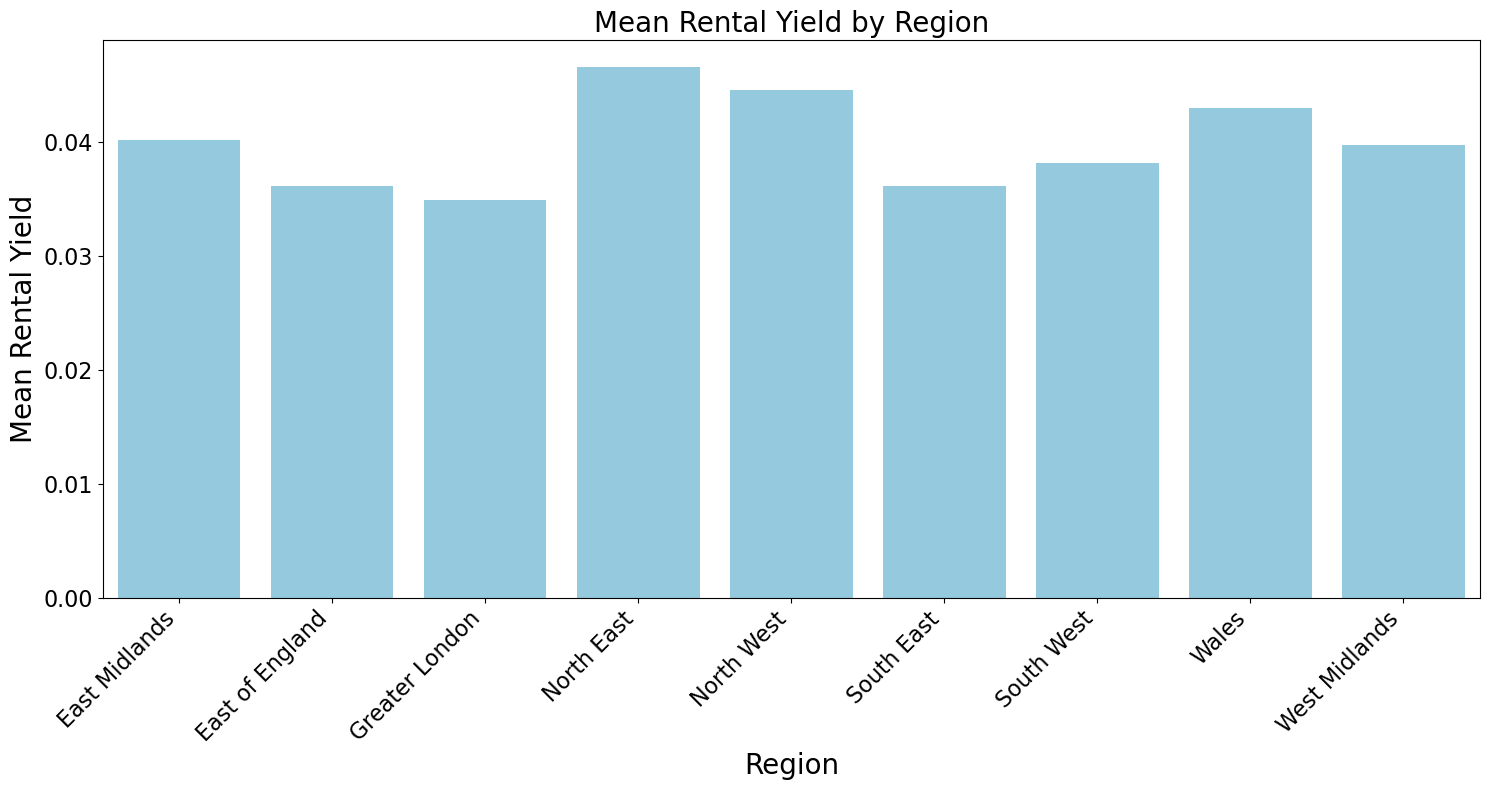

In [14]:
to_plot = data.groupby('UK_REGION')['YIELD'].mean().reset_index()


# Set the color for all bars
bar_color = 'skyblue'

# Create the barplot
plt.figure(figsize=(15, 8))  # Adjust figure size for better readability
sns.barplot(x='UK_REGION', y='YIELD', data=to_plot, color=bar_color)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=_xticks)
plt.yticks( fontsize=_yticks)

# def thousands_formatter(x, pos):
#     return '{:,.0f}'.format(x)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
plt.xlabel('Region', fontsize=_xlab)
plt.ylabel('Mean Rental Yield', fontsize=_ylab)
plt.title('Mean Rental Yield by Region', fontsize=_title)

# Show the plot
plt.tight_layout()

plt.savefig('./plots/Mean Rental Yield by Region.png', bbox_inches='tight')

plt.show()

# plt.fig.savefig('./plots/Mean Rental Yield by Region.png')

### Yield Vs Boroughs avg house size

In [15]:
data.groupby('AVG_BEDROOMS').count()['YIELD']

AVG_BEDROOMS
0.0      1
1.0      9
2.0    279
3.0    950
4.0      1
Name: YIELD, dtype: int64

C:\Users\milen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


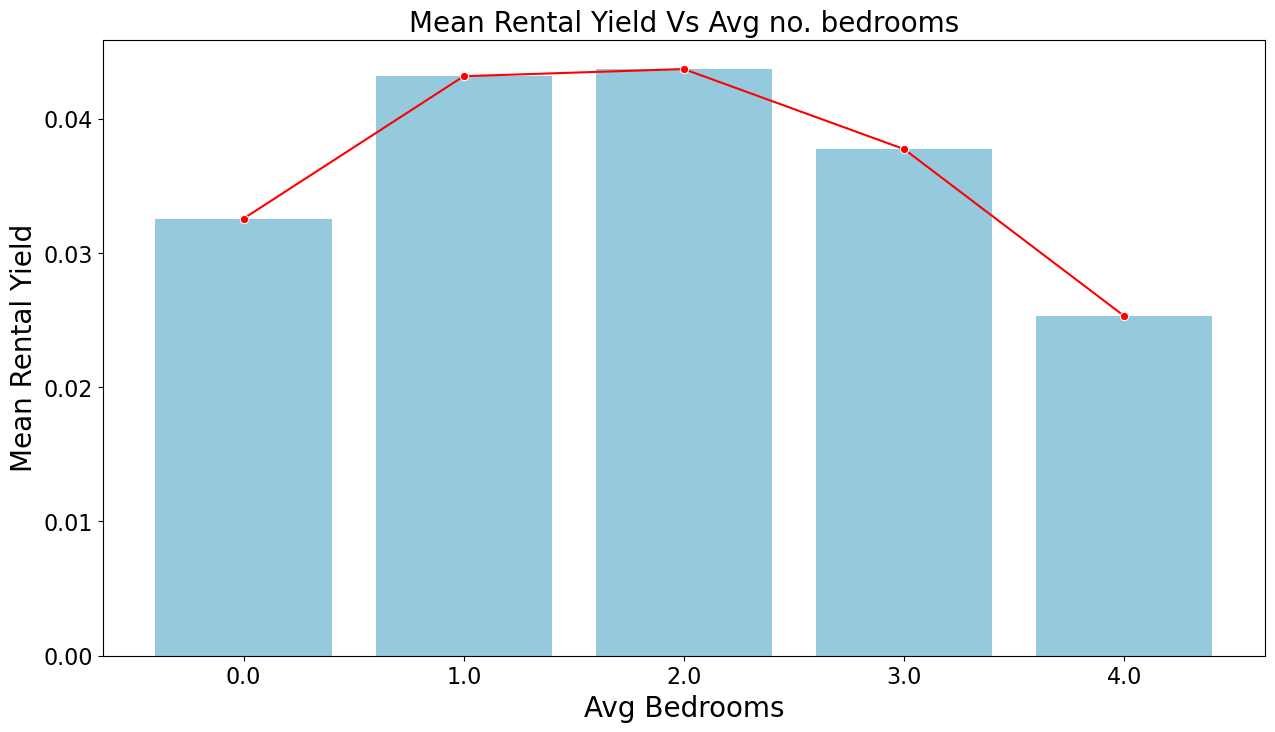

In [16]:
to_plot = data.groupby('AVG_BEDROOMS')['YIELD'].mean().reset_index()

plt.figure(figsize=(15, 8))  # Adjust figure size for better readability

sns.barplot(x=to_plot['AVG_BEDROOMS'], y=to_plot['YIELD'],color=bar_color)
sns.lineplot(x=to_plot["AVG_BEDROOMS"], y=to_plot["YIELD"], color='red', marker='o')


# Rotate x labels for better readability
plt.xticks(fontsize=_xticks)
plt.yticks(fontsize=_yticks)

# def thousands_formatter(x, pos):
#     return '{:,.0f}'.format(x)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))



# Add labels and title
plt.xlabel('Avg Bedrooms', fontsize=_xlab)
plt.ylabel('Mean Rental Yield', fontsize=_ylab)
plt.title('Mean Rental Yield Vs Avg no. bedrooms', fontsize=_title)

plt.savefig('./plots/Mean Rental Yield Vs Avg no bedrooms.png', bbox_inches='tight')

In [17]:
_aspect=1.2

C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

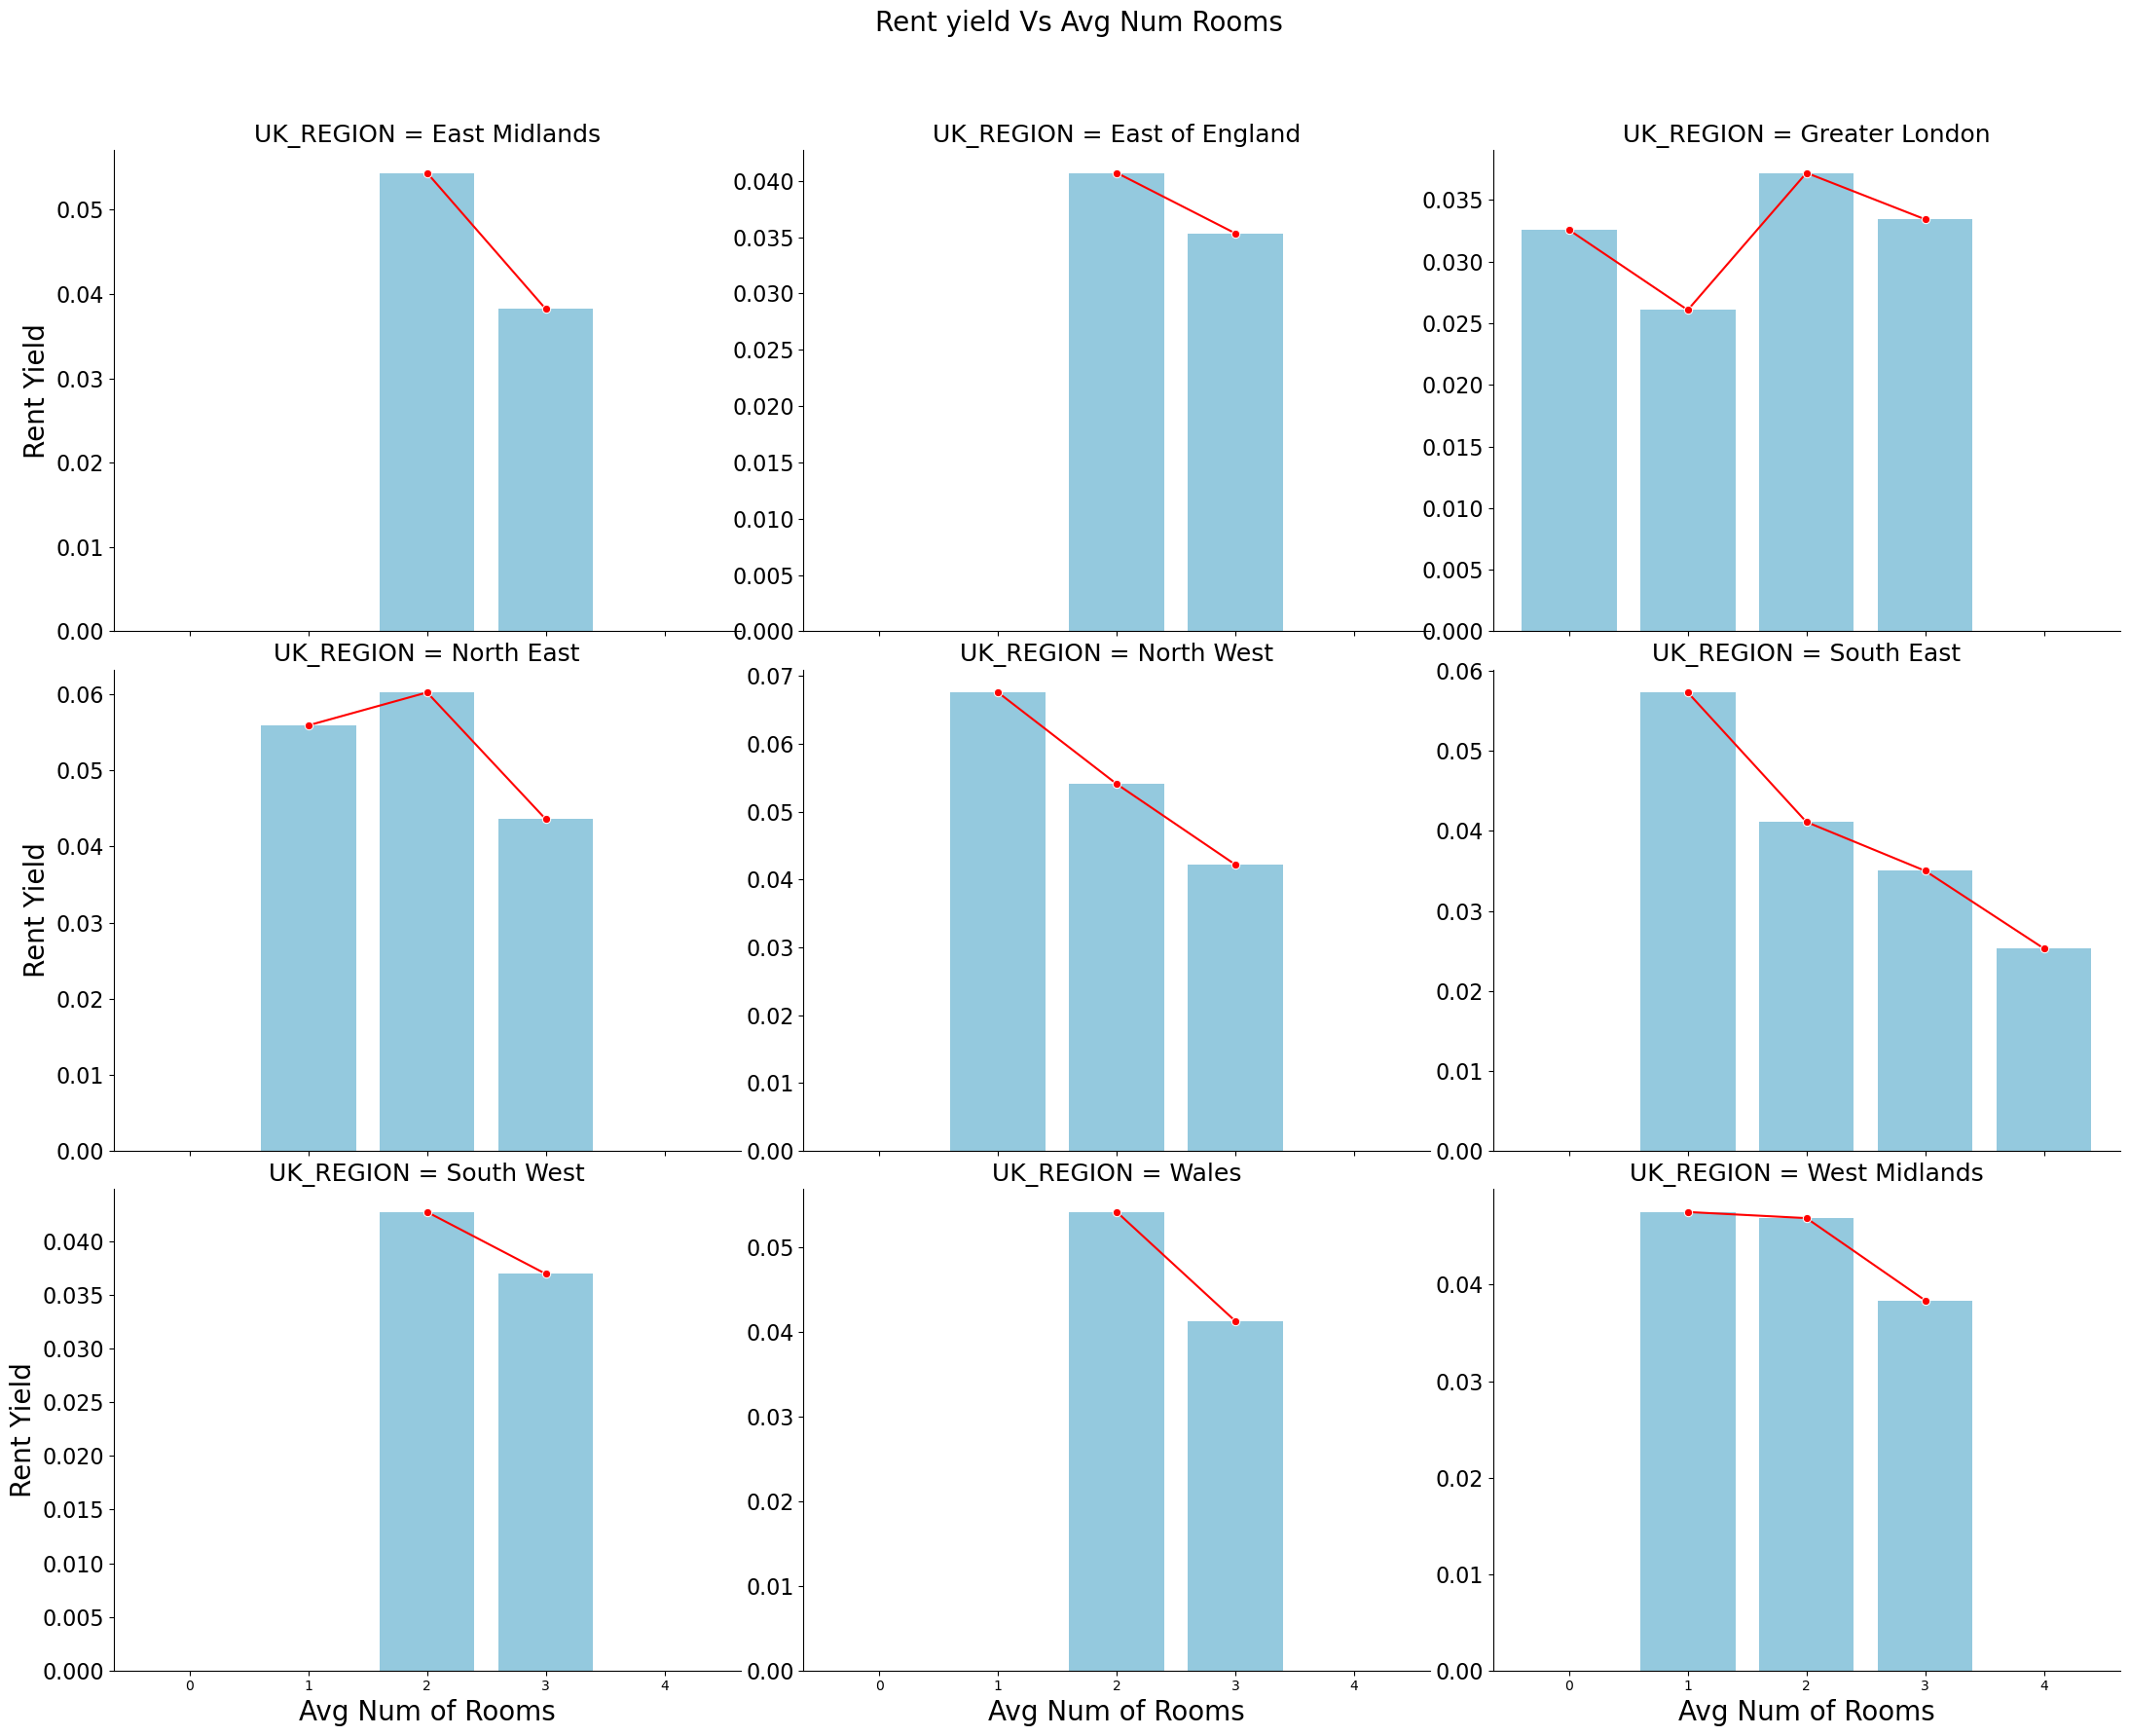

In [18]:
to_plot = data.groupby(['UK_REGION','AVG_BEDROOMS'])['YIELD'].mean().reset_index()

# Convert the 'Category' column to a categorical type and specify the order
category_order = [0, 1, 2, 3, 4]
to_plot['AVG_BEDROOMS'] = pd.Categorical(to_plot['AVG_BEDROOMS'], categories=category_order, ordered=True)



# Set the color for all bars
bar_color = 'skyblue'

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="UK_REGION", height=6, aspect=_aspect, col_wrap=3, sharey=False, sharex=True)
g.map_dataframe(sns.barplot, x="AVG_BEDROOMS", y="YIELD", color=bar_color)

g.map_dataframe(sns.lineplot, x="AVG_BEDROOMS", y="YIELD", color='red', marker='o')

for ax in g.axes.flat:
    # ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)

g.set_titles(size=12)

g.fig.subplots_adjust(top=0.9)  # Adjust title position



# Add labels and title
g.set_axis_labels("Avg Num of Rooms", "Rent Yield", fontsize=_xlab)
g.fig.suptitle('Rent yield Vs Avg Num Rooms ', fontsize=_title)
g.fig.subplots_adjust(top=0.9)  # Adjust title position
g.set_titles(size=_facet_titles)

plt.savefig('./plots/Rent yield Vs Avg Num Rooms.png', bbox_inches='tight')



### Higher yield in the North

Can it be explained by a higher proportion of boroughs with 2bed flats? **NO**

In [19]:
count_by_region_size = data.groupby(['UK_REGION','AVG_BEDROOMS']).count()['YIELD'].reset_index().rename(columns={'YIELD':'COUNT'})

count_by_region_size = count_by_region_size.set_index('AVG_BEDROOMS')

count_by_region_size.groupby('UK_REGION').apply(lambda x: x['COUNT']/x['COUNT'].sum())

UK_REGION        AVG_BEDROOMS
East Midlands    2.0             0.122449
                 3.0             0.877551
East of England  2.0             0.154930
                 3.0             0.845070
                 4.0             0.000000
Greater London   0.0             0.003831
                 1.0             0.015326
                 2.0             0.432950
                 3.0             0.547893
North East       1.0             0.017094
                 2.0             0.170940
                 3.0             0.811966
                 4.0             0.000000
North West       1.0             0.005747
                 2.0             0.189655
                 3.0             0.804598
South East       1.0             0.005208
                 2.0             0.182292
                 3.0             0.807292
                 4.0             0.005208
South West       2.0             0.213483
                 3.0             0.786517
                 4.0             0.000000
Wale

### Rent yield Vs number of sales

- Metric not relly significant looking at the number total of sales, but when normalised clear trend.
- Relationship between scarcity of sales on the market and rental yield. Yield is higher when the sales market is weak.
Is this just a case for that month or a trend. That would need to be investigated further.



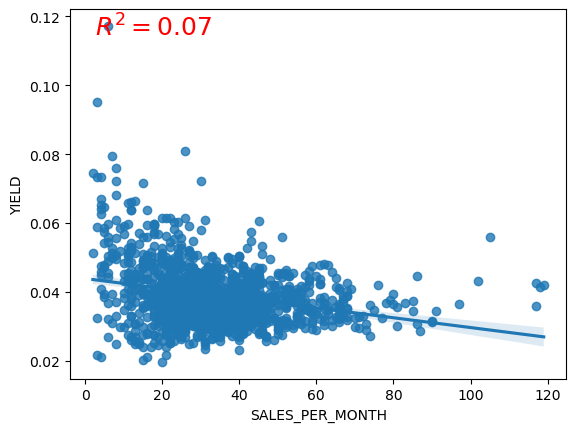

In [20]:
regplot_with_r2(data, 'SALES_PER_MONTH','YIELD')

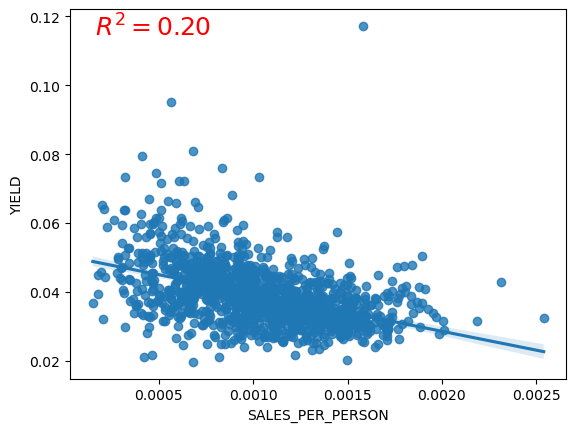

In [21]:
regplot_with_r2(data, 'SALES_PER_PERSON', 'YIELD')

C:\Users\milen\AppData\Local\Temp\ipykernel_12668\1967288167.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\1967288167.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\1967288167.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\1967288167.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

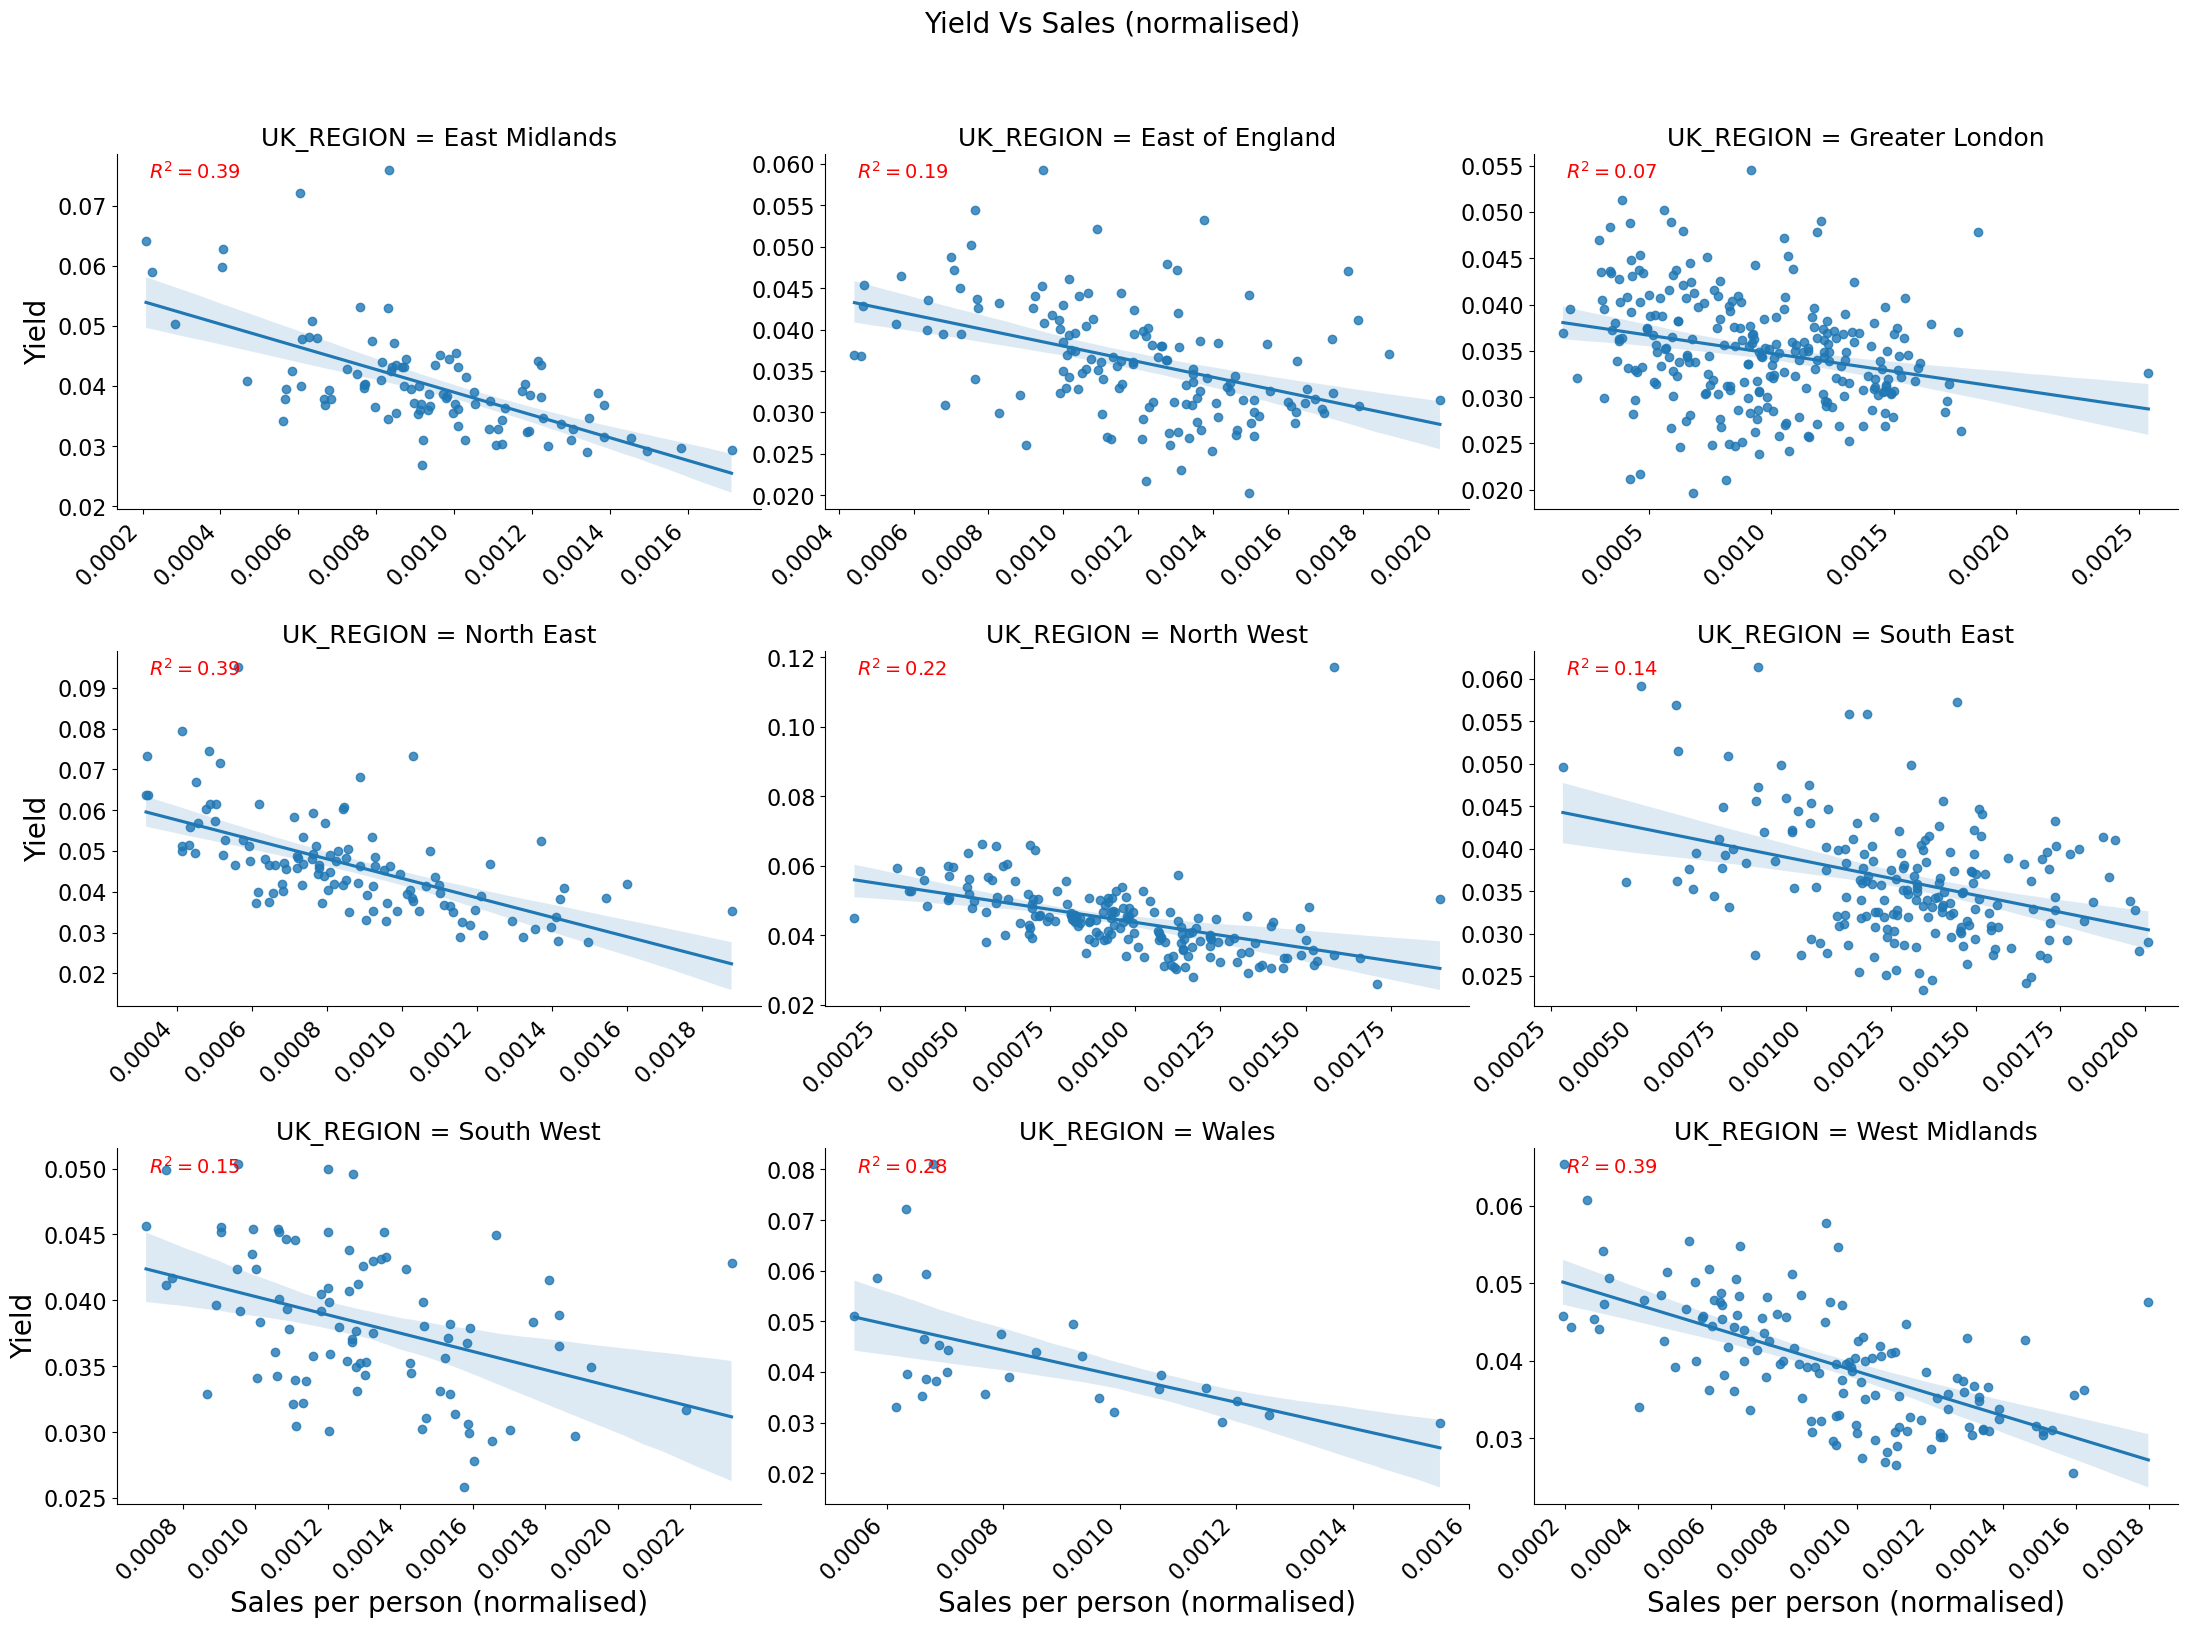

In [22]:


# Sample data
# Assuming 'data' is a DataFrame with columns 'UK_REGION', 'YIELD', 'SALES_PER_PERSON'

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)


# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=6, aspect=_aspect, col_wrap=3, sharey=False, sharex=False)
g.map_dataframe(regplot_with_r2, y="YIELD", x="SALES_PER_PERSON", _r2_fontsize=14)

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
    # ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

g.set_titles(size=12)

g.fig.subplots_adjust(top=0.9)  # Adjust title position
g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.4, wspace=0.1)  # Adjusted values

# Add labels and title
g.set_axis_labels("Sales per person (normalised)", "Yield", fontsize=_xlab)
g.fig.suptitle('Yield Vs Sales (normalised)', fontsize=_title)
g.set_titles(size=_facet_titles)

# Save the plot
g.savefig('./plots/Sales per person (normalised) Vs Yield.png', bbox_inches='tight')

# Show the plot
plt.show()


### Yield Vs Population

-  More populated boroughs tend to have higher yield
-  Results are a mixed bad, but some are better like: south east and greater london

<Axes: xlabel='AVG_POPULATION', ylabel='YIELD'>

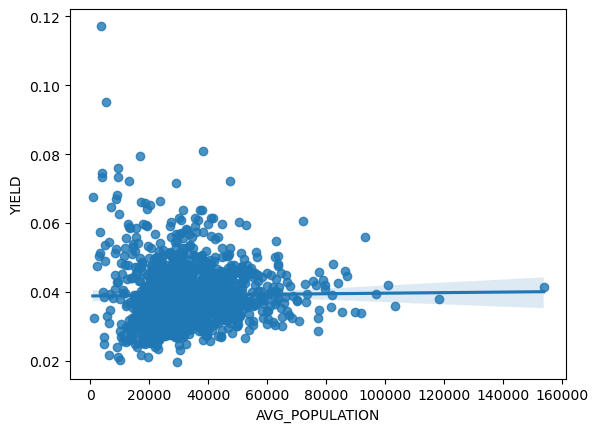

In [23]:
sns.regplot(x=data['AVG_POPULATION'], y=data['YIELD'])

C:\Users\milen\AppData\Local\Temp\ipykernel_12668\3370328708.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\3370328708.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\3370328708.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\3370328708.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

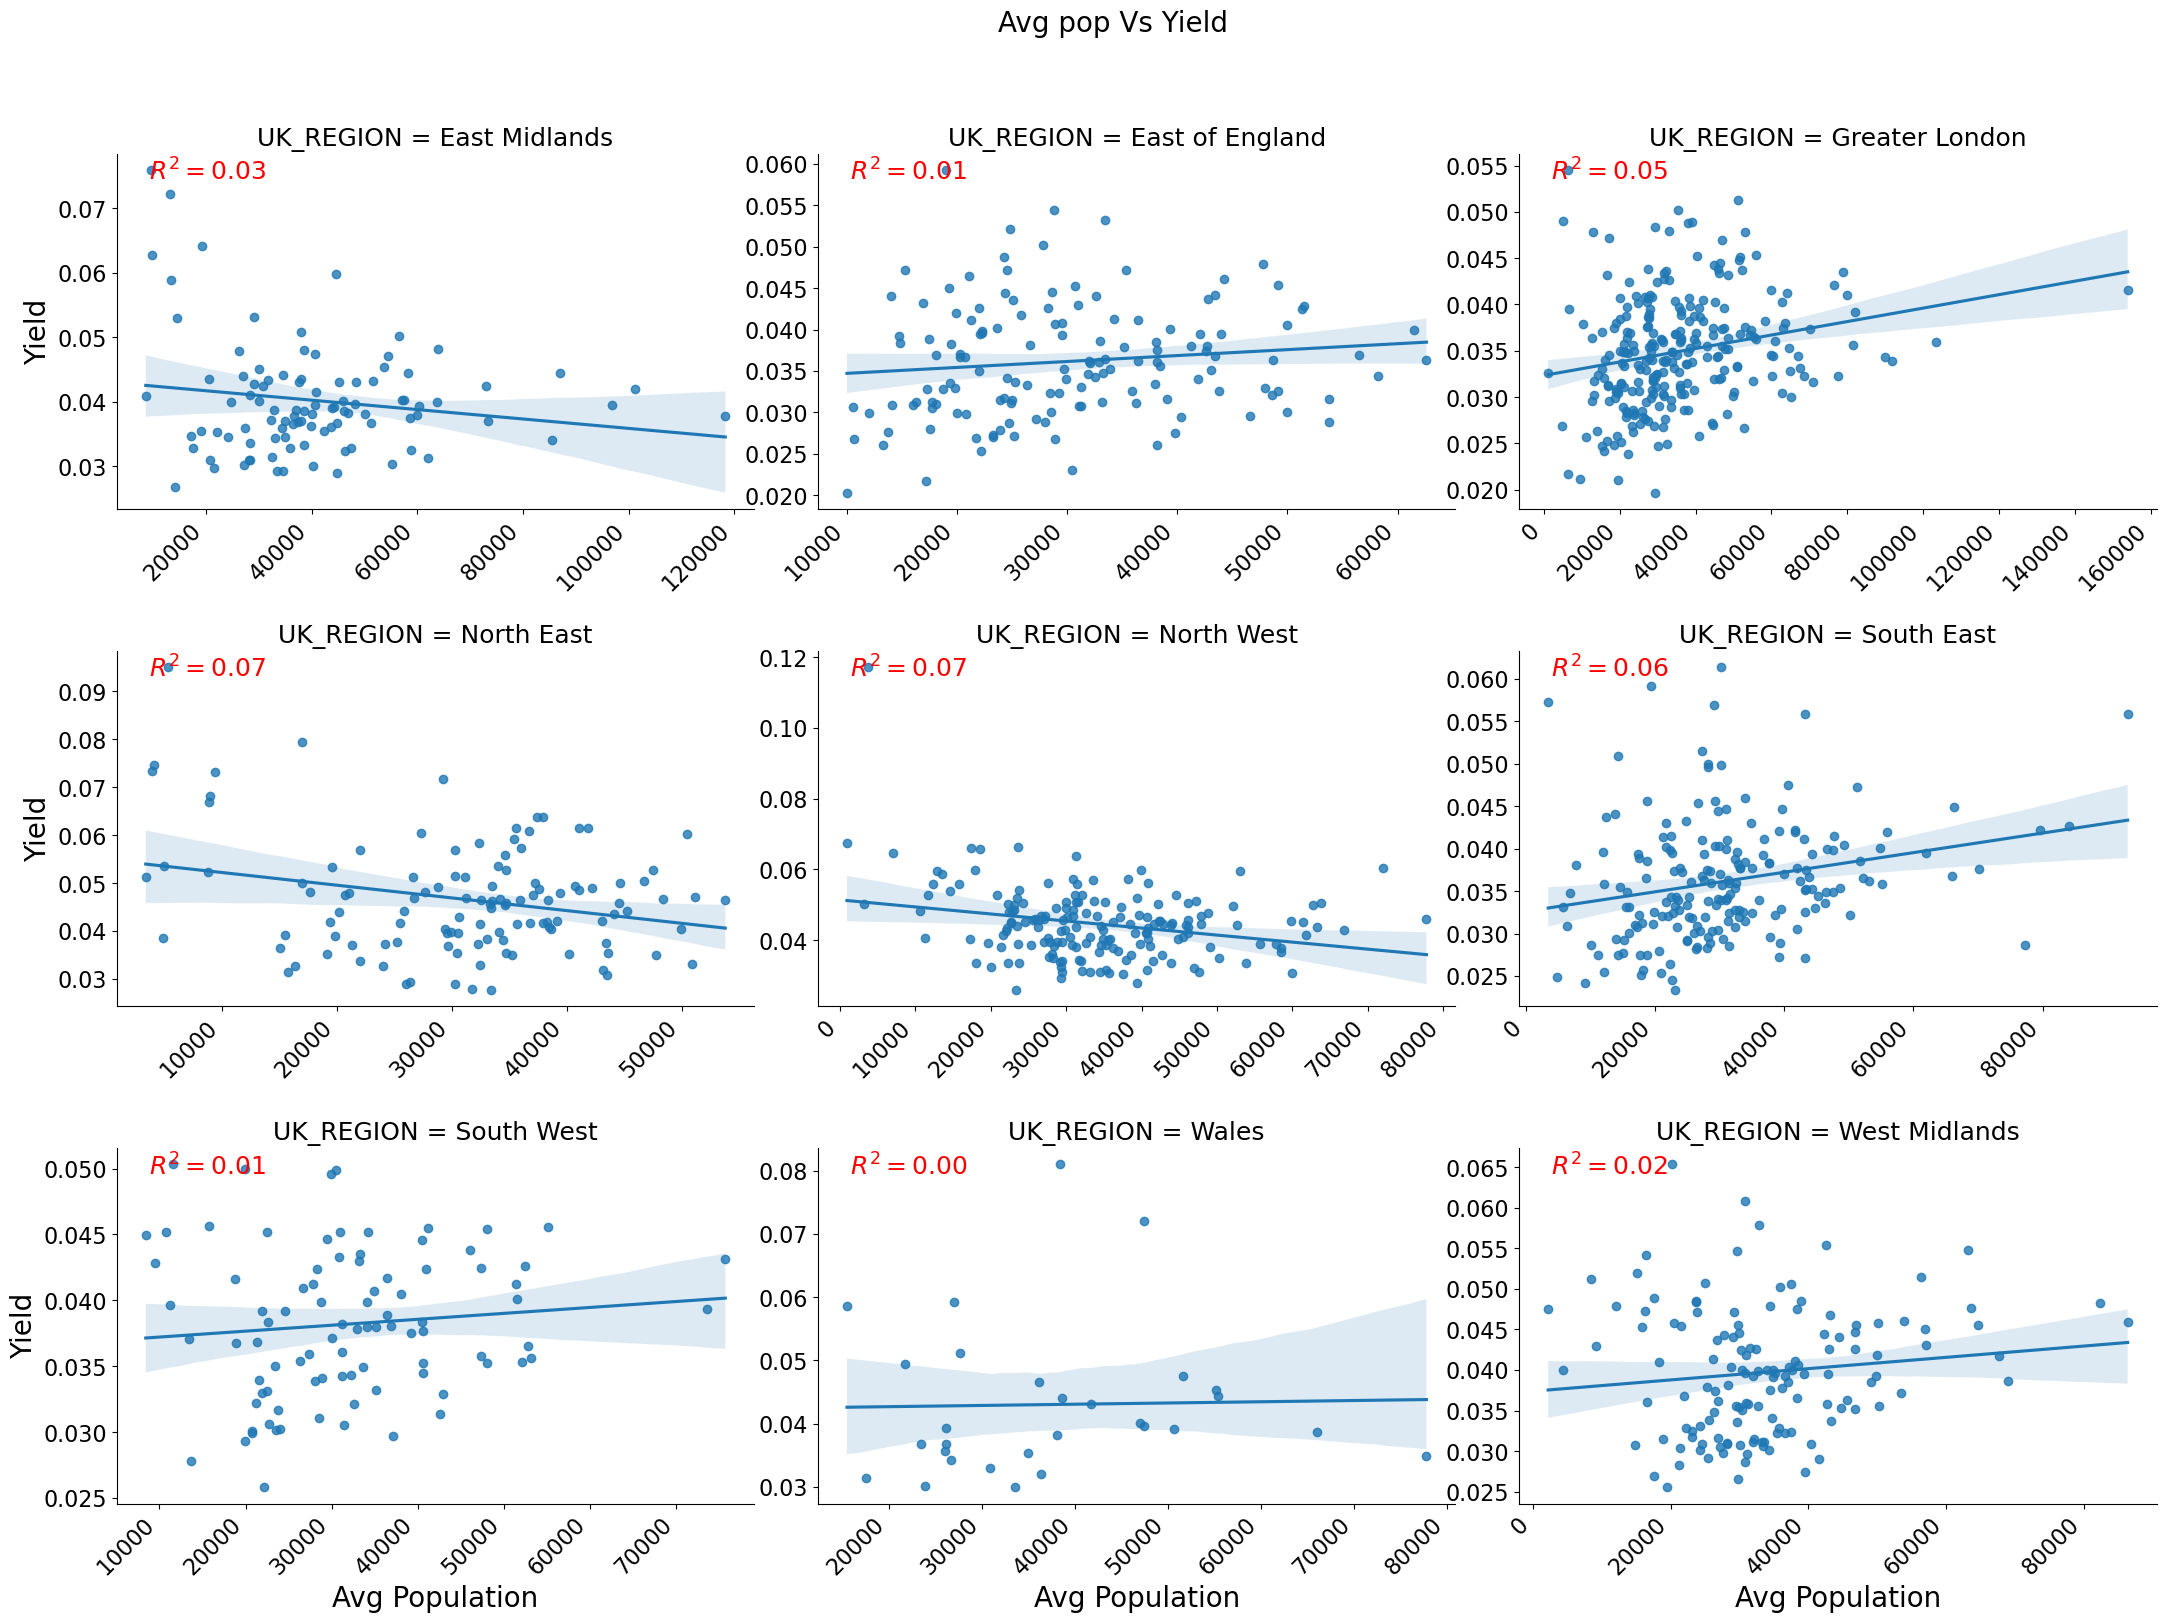

In [24]:


# Sample data

# Melt the DataFrame
data

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)


# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=6, aspect=_aspect, col_wrap=3, sharey=False, sharex=False)
g.map_dataframe(regplot_with_r2, y="YIELD", x="AVG_POPULATION")

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
    # ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

g.set_titles(size=12)

g.fig.subplots_adjust(top=0.9)  # Adjust title position

g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.4, wspace=0.1)  # Adjusted values


# Add labels and title
g.set_axis_labels("Avg Population", "Yield", fontsize=_xlab)
g.fig.suptitle('Avg pop Vs Yield', fontsize=_title)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

g.set_titles(size=_facet_titles)

g.savefig('./plots/Avg population Vs Yield.png', bbox_inches='tight')


# Sales

**Capital required**:
- South areas more expensive,
- Higher capital required for investments
- To connect to the fact that the yield is generaly lower

**Liquidity**:
- More populated areas have higher number of sales. Pretty obvious one, but essential for liquidity analysis on the investment.
- Looking at normalised data over population, East, south east and south west are the most liquid.


**Price Vs Population:**
- results suggest that theres an inverse relation between these two variables.
- This means that highly densly populated areas probably also correspond to poorer neighborhood
    - Look at exampes: Croydv westken
- Counter intuitive as you'd expect more remote areas to be less expensive. ( maybe bigger houses)

  
**Asking Price Vs Sales (normalised)**:- Where there are more sales per capita, the prices tend to be higher.
- 
Speculative market tend to inflates price 
- 
Might want to invest away from these regin
s?

**Average asking price by bedroo**ms  
In greater London boroughs with predominantly smaller houses cost more than bigg - more c
-  
We tend to find bigger houses are further away from central 


**Sales and avg size house**:
- Not meaningful because too many boroughs with 3 beds Vs the restareasses?)

In [25]:
data.groupby('UK_REGION').describe().T

UK_REGION                   East Midlands  East of England  Greater London  \
AVG_ASKING_PRICE     count     162.000000       234.000000    2.740000e+02   
                     mean   217469.524691    358678.290598    5.502826e+05   
                     std     68780.382556    120224.714692    2.415004e+05   
                     min     73258.000000    168612.000000    2.122420e+05   
                     25%    162092.500000    278430.250000    4.150970e+05   
                     50%    208276.500000    335141.000000    4.962990e+05   
                     75%    261955.750000    413393.250000    6.119592e+05   
                     max    421212.000000    945555.000000    2.147277e+06   
AVG_ASKING_RENT_(PM) count      98.000000       142.000000    2.610000e+02   
                     mean      673.183673      1006.161972    1.524222e+03   
                     std       120.053626       219.586156    4.580859e+02   
                     min       437.000000       584.000000    9.350000e+02   
                     25%       592.750000       850.250000    1.275000e+03   
                     50%       664.500000       990.000000    1.373000e+03   
                     75%       754.250000      1148.750000    1.601000e+03   
                     max      1057.000000      1706.000000    3.765000e+03   
SALES_PER_MONTH      count     163.000000       235.000000    2.740000e+02   
                     mean       30.294479        29.829787    3.028467e+01   
                     std        18.060575        16.053755    1.657614e+01   
                     min         2.000000         2.000000    3.000000e+00   
                     25%        17.000000        18.000000    2.000000e+01   
                     50%        25.000000        27.000000    2.700000e+01   
                     75%        42.000000        38.500000    3.700000e+01   
                     max        90.000000        90.000000    1.180000e+02   
AVG_BEDROOMS         count     163.000000       235.000000    2.740000e+02   
                     mean        2.907975         2.902128    2.547445e+00   
                     std         0.289951         0.311797    5.476664e-01   
                     min         2.000000         2.000000    0.000000e+00   
                     25%         3.000000         3.000000    2.000000e+00   
                     50%         3.000000         3.000000    3.000000e+00   
                     75%         3.000000         3.000000    3.000000e+00   
                     max         3.000000         4.000000    3.000000e+00   
AVG_POPULATION       count     163.000000       235.000000    2.740000e+02   
                     mean    32392.711656     24174.736170    3.461653e+04   
                     std     19704.548814     12831.935884    1.870044e+04   
                     min      2781.000000      2089.000000    1.181000e+03   
                     25%     18814.500000     14442.000000    2.183925e+04   
                     50%     29926.000000     22148.000000    3.128600e+04   
                     75%     41821.000000     32282.500000    4.460025e+04   
                     max    118270.000000     62621.000000    1.538110e+05   
YIELD                count      98.000000       142.000000    2.610000e+02   
                     mean        0.040202         0.036167    3.493399e-02   
                     std         0.008694         0.006873    5.968036e-03   
                     min         0.026826         0.020299    1.968147e-02   
                     25%         0.034917         0.031176    3.083660e-02   
                     50%         0.038638         0.035764    3.475180e-02   
                     75%         0.043223         0.040409    3.840558e-02   
                     max         0.076005         0.059313    5.456036e-02   
SALES_PER_PERSON     count     163.000000       235.000000    2.740000e+02   
                     mean        0.000970         0.001305    9.679717e-04   
                     s

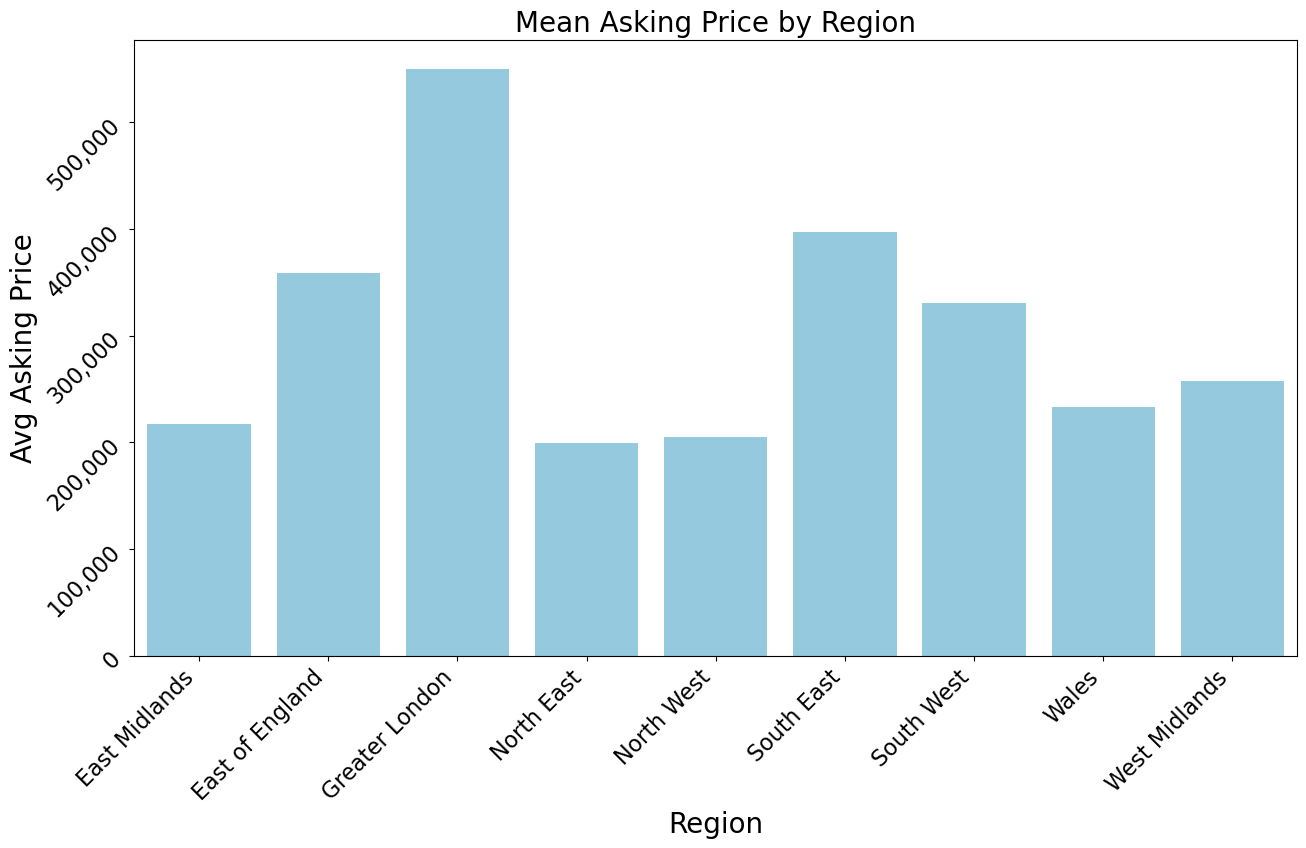

In [26]:
to_plot = data.groupby('UK_REGION')['AVG_ASKING_PRICE'].mean().reset_index()
to_plot_rhs = data.groupby('UK_REGION')['SALES_PER_MONTH'].mean().reset_index()

# Set the color for all bars
bar_color = 'skyblue'

# Create the barplot
plt.figure(figsize=(15, 8))  # Adjust figure size for better readability
sns.barplot(x='UK_REGION', y='AVG_ASKING_PRICE', data=to_plot, color=bar_color)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right',  fontsize=_xticks)
plt.yticks(rotation=45, ha='right',  fontsize=_yticks)

def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# plt.gca().yaxis.set_major_formatter(fontsize=_yticks)

# Add labels and title
plt.xlabel('Region',fontsize=_xlab)
plt.ylabel('Avg Asking Price', fontsize=_ylab)
plt.title('Mean Asking Price by Region', fontsize=_title)

# Show the plot



g.savefig('./plots/Mean Asking Price by Region.png', bbox_inches='tight')




## Liquidity

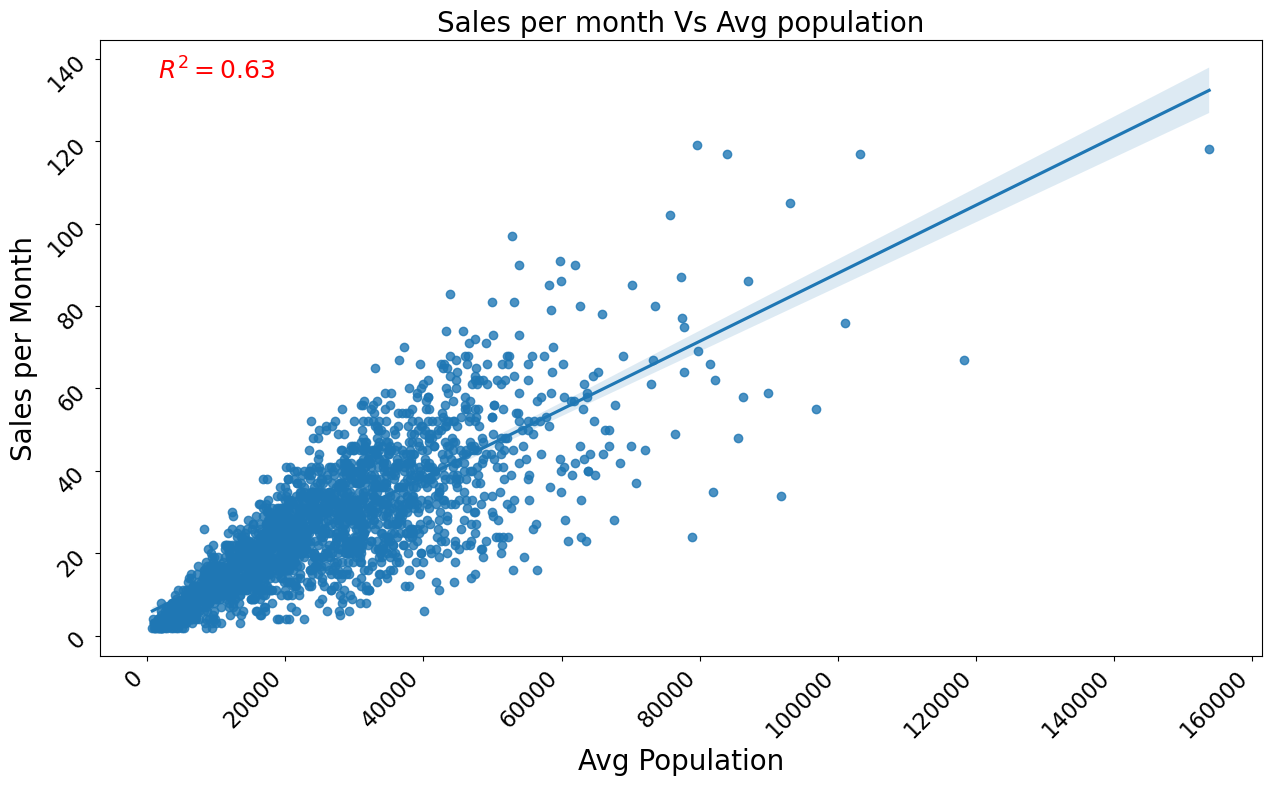

In [27]:

plt.figure(figsize=(15, 8)) 
# sns.regplot(x=data.AVG_POPULATION, y=data.SALES_PER_MONTH)

regplot_with_r2(data, 'AVG_POPULATION', 'SALES_PER_MONTH') 

plt.xticks(rotation=45, ha='right',  fontsize=_xticks)
plt.yticks(rotation=45, ha='right',  fontsize=_yticks)

# Add labels and title
plt.xlabel('Avg Population',fontsize=_xlab)
plt.ylabel('Sales per Month', fontsize=_ylab)
plt.title('Sales per month Vs Avg population', fontsize=_title)


plt.savefig('./plots/Sales per month Vs Avg population.png', bbox_inches='tight')


In [28]:
to_plot = data.groupby('UK_REGION')['SALES_PER_PERSON'].mean().reset_index()

In [29]:
to_plot

UK_REGION  SALES_PER_PERSON
0    East Midlands          0.000970
1  East of England          0.001305
2   Greater London          0.000968
3       North East          0.000969
4       North West          0.001000
5       South East          0.001358
6       South West          0.001429
7            Wales          0.001029
8    West Midlands          0.000961

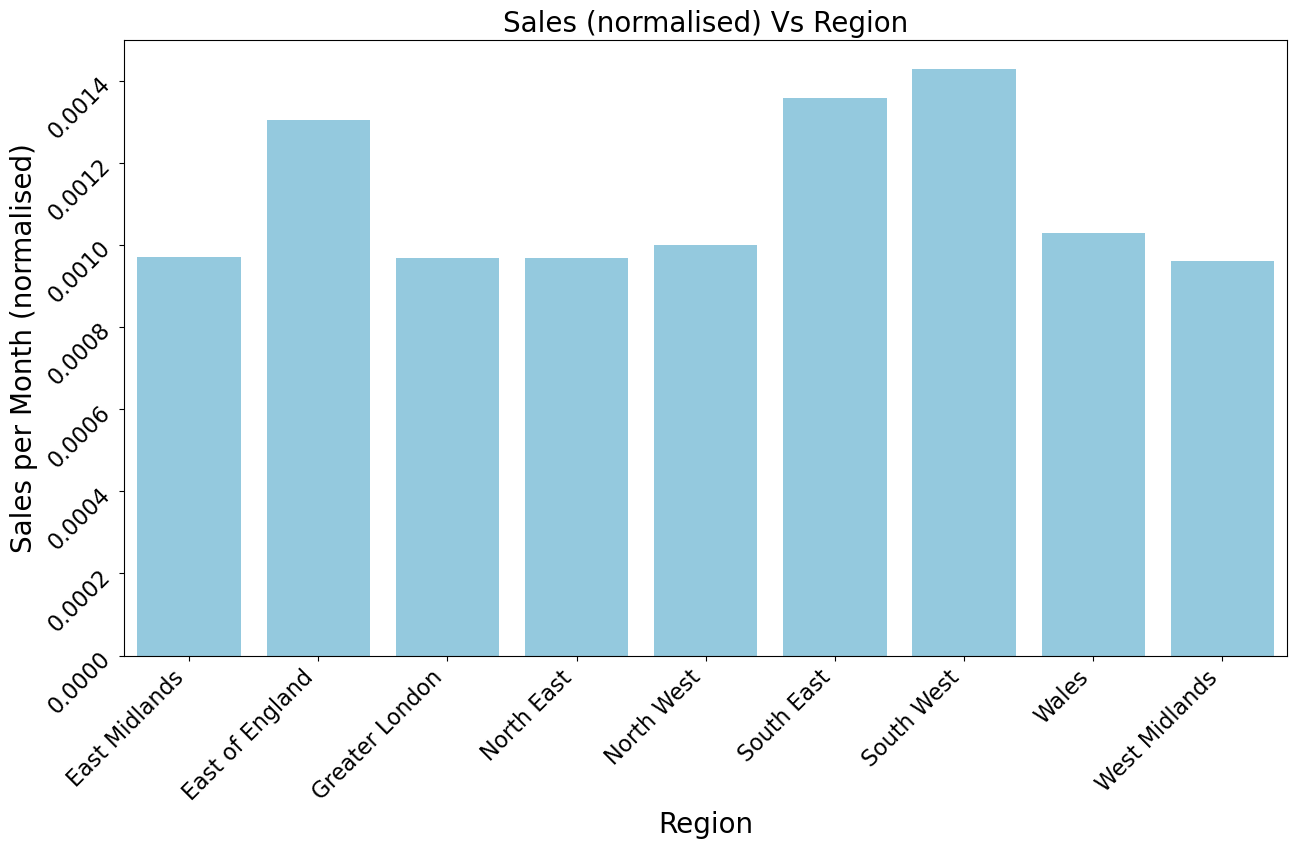

In [30]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(x=to_plot['UK_REGION'], y=to_plot['SALES_PER_PERSON'], color=bar_color)



plt.xticks(rotation=45, ha='right',  fontsize=_xticks)
plt.yticks(rotation=45, ha='right',  fontsize=_yticks)



# Add labels and title
plt.xlabel('Region',fontsize=_xlab)
plt.ylabel('Sales per Month (normalised)', fontsize=_ylab)
plt.title('Sales (normalised) Vs Region', fontsize=_title)

g.savefig('./plots/Sales (normalised) Vs Region.png', bbox_inches='tight')


## Visualise some ratios.

**Price Vs Population:** results suggest that there's an inverse relation between these two variables.

- This means that highly densly populated areas probably also correspond to poorer neighborhoods.
- Look at examples: Croydon Vs West Ken
  
- Counter-intuitive as you'd expect more remote areas (less populated) to be less expensive. ( maybe bigger/luxury houses?)
- Looking for bigger houses (color coded), but too many 3 beds houses. not meaningful.

In [31]:
data.groupby('AVG_BEDROOMS').count()['POSTCODE']

AVG_BEDROOMS
0.0       2
1.0       9
2.0     301
3.0    1867
4.0       4
Name: POSTCODE, dtype: int64

C:\Users\milen\AppData\Local\Temp\ipykernel_12668\931132846.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\931132846.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\931132846.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\931132846.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

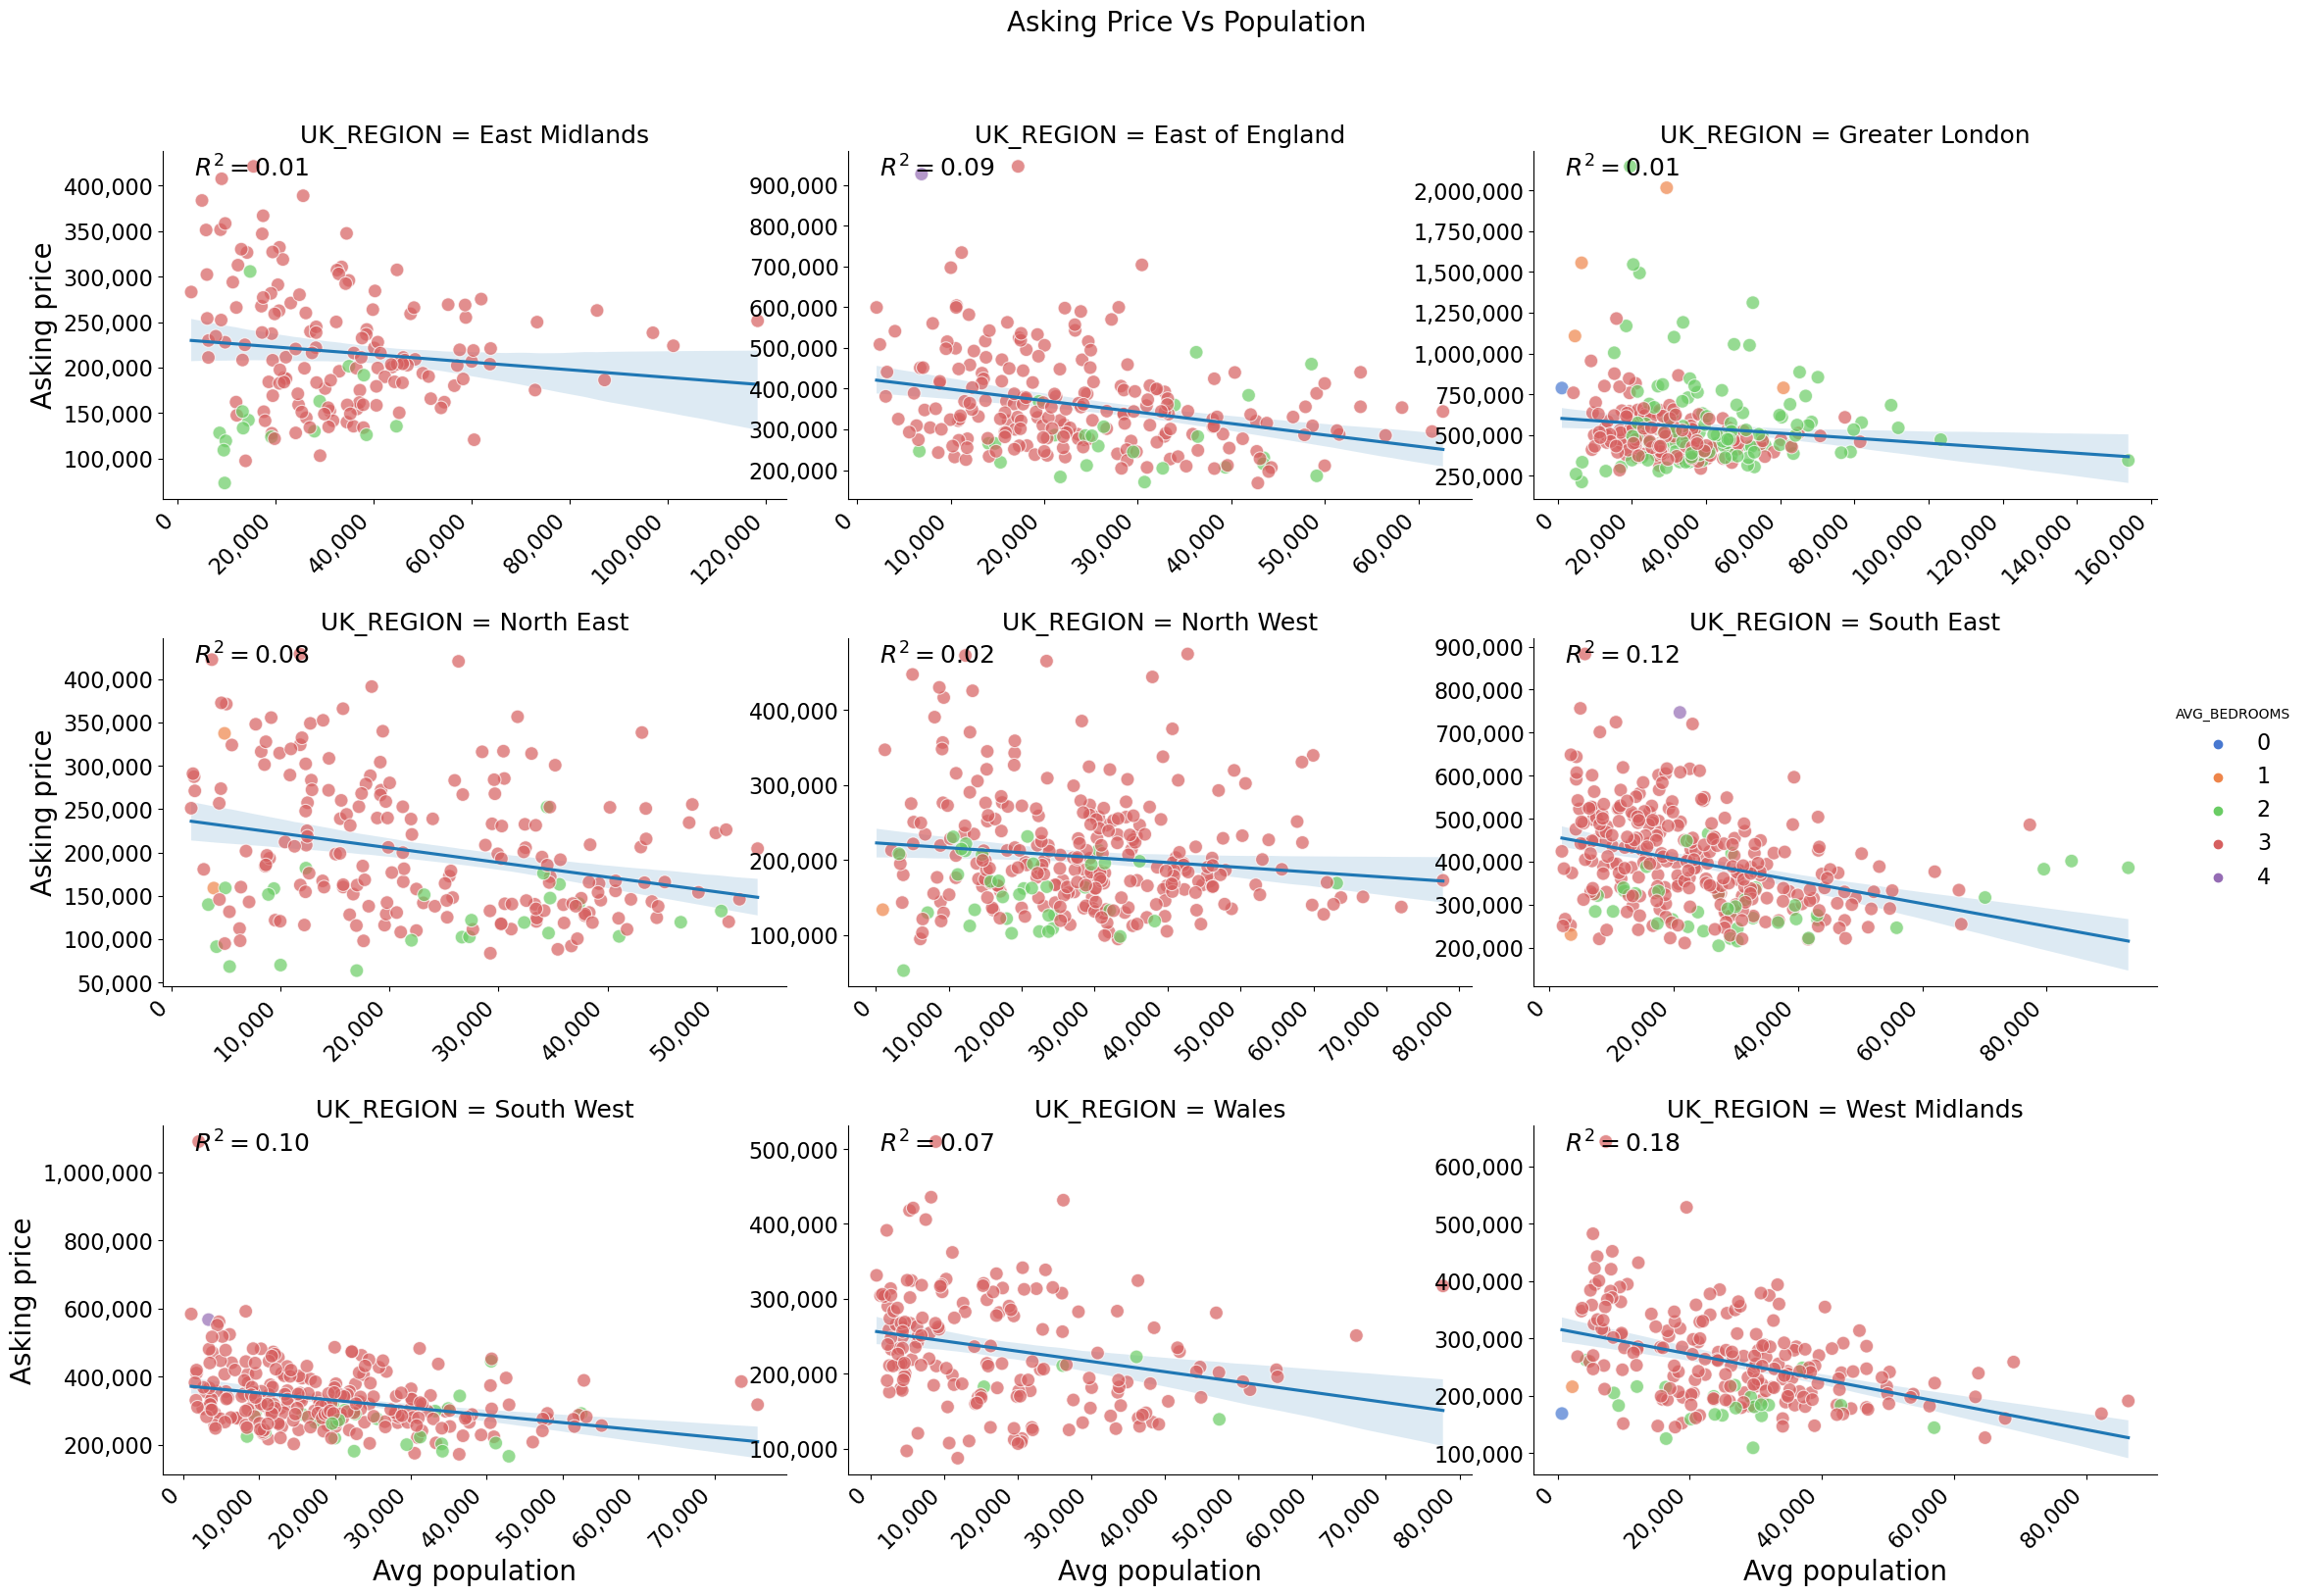

In [32]:


# Sample data


to_plot = data.copy()

# Convert the 'Category' column to a categorical type and specify the order
category_order = [0, 1, 2, 3, 4]
to_plot['AVG_BEDROOMS'] = pd.Categorical(to_plot['AVG_BEDROOMS'], categories=category_order, ordered=True)

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)



# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False, sharex=False)
g.map_dataframe(regplot_with_r2, x="AVG_POPULATION", y="AVG_ASKING_PRICE", _r2_color='black', scatter=False)

g.map_dataframe(sns.scatterplot, x='AVG_POPULATION', y='AVG_ASKING_PRICE', hue='AVG_BEDROOMS', palette='muted', s=100,alpha=0.7)


# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
    ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.4, wspace=0.1)  # Adjusted values

# Add labels and title
g.set_axis_labels("Avg population", "Asking price",fontsize=_xlab)
g.fig.suptitle('Asking Price Vs Population', fontsize=_title)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

handles, labels = g.axes.flat[0].get_legend_handles_labels()
g.add_legend(title='AVG_BEDROOMS', fontsize=16)

g.set_titles(size=_facet_titles)

g.savefig('./plots/Asking Price Vs Population.png', bbox_inches='tight')


In [33]:
xx=data[data.UK_REGION=='Greater London']

In [34]:

xx[xx.AVG_ASKING_PRICE>1800000]

UK_REGION POSTCODE  AVG_ASKING_PRICE  AVG_ASKING_RENT_(PM)  \
602  Greater London      SW7         2147277.0                3765.0   
645  Greater London       W1         2016313.0                3307.0   

     SALES_PER_MONTH  AVG_BEDROOMS  AVG_POPULATION     YIELD  SALES_PER_PERSON  
602             16.0           2.0           19587  0.021041          0.000817  
645             20.0           1.0           29411  0.019681          0.000680

In [35]:
xx[xx.AVG_POPULATION>100000]

UK_REGION POSTCODE  AVG_ASKING_PRICE  AVG_ASKING_RENT_(PM)  \
406  Greater London      CR0          344196.0                1192.0   
447  Greater London      E17          471876.0                1412.0   

     SALES_PER_MONTH  AVG_BEDROOMS  AVG_POPULATION     YIELD  SALES_PER_PERSON  
406            118.0           2.0          153811  0.041558          0.000767  
447            117.0           2.0          103276  0.035908          0.001133

### Asking Price Vs Sales (normalised)

-  Where there are more sales per capita, the prices tend to be higher.
-  Speculative market tend to inflates prices.
-  Might want to invest away from these regions?

C:\Users\milen\AppData\Local\Temp\ipykernel_12668\35904879.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\35904879.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\35904879.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\35904879.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

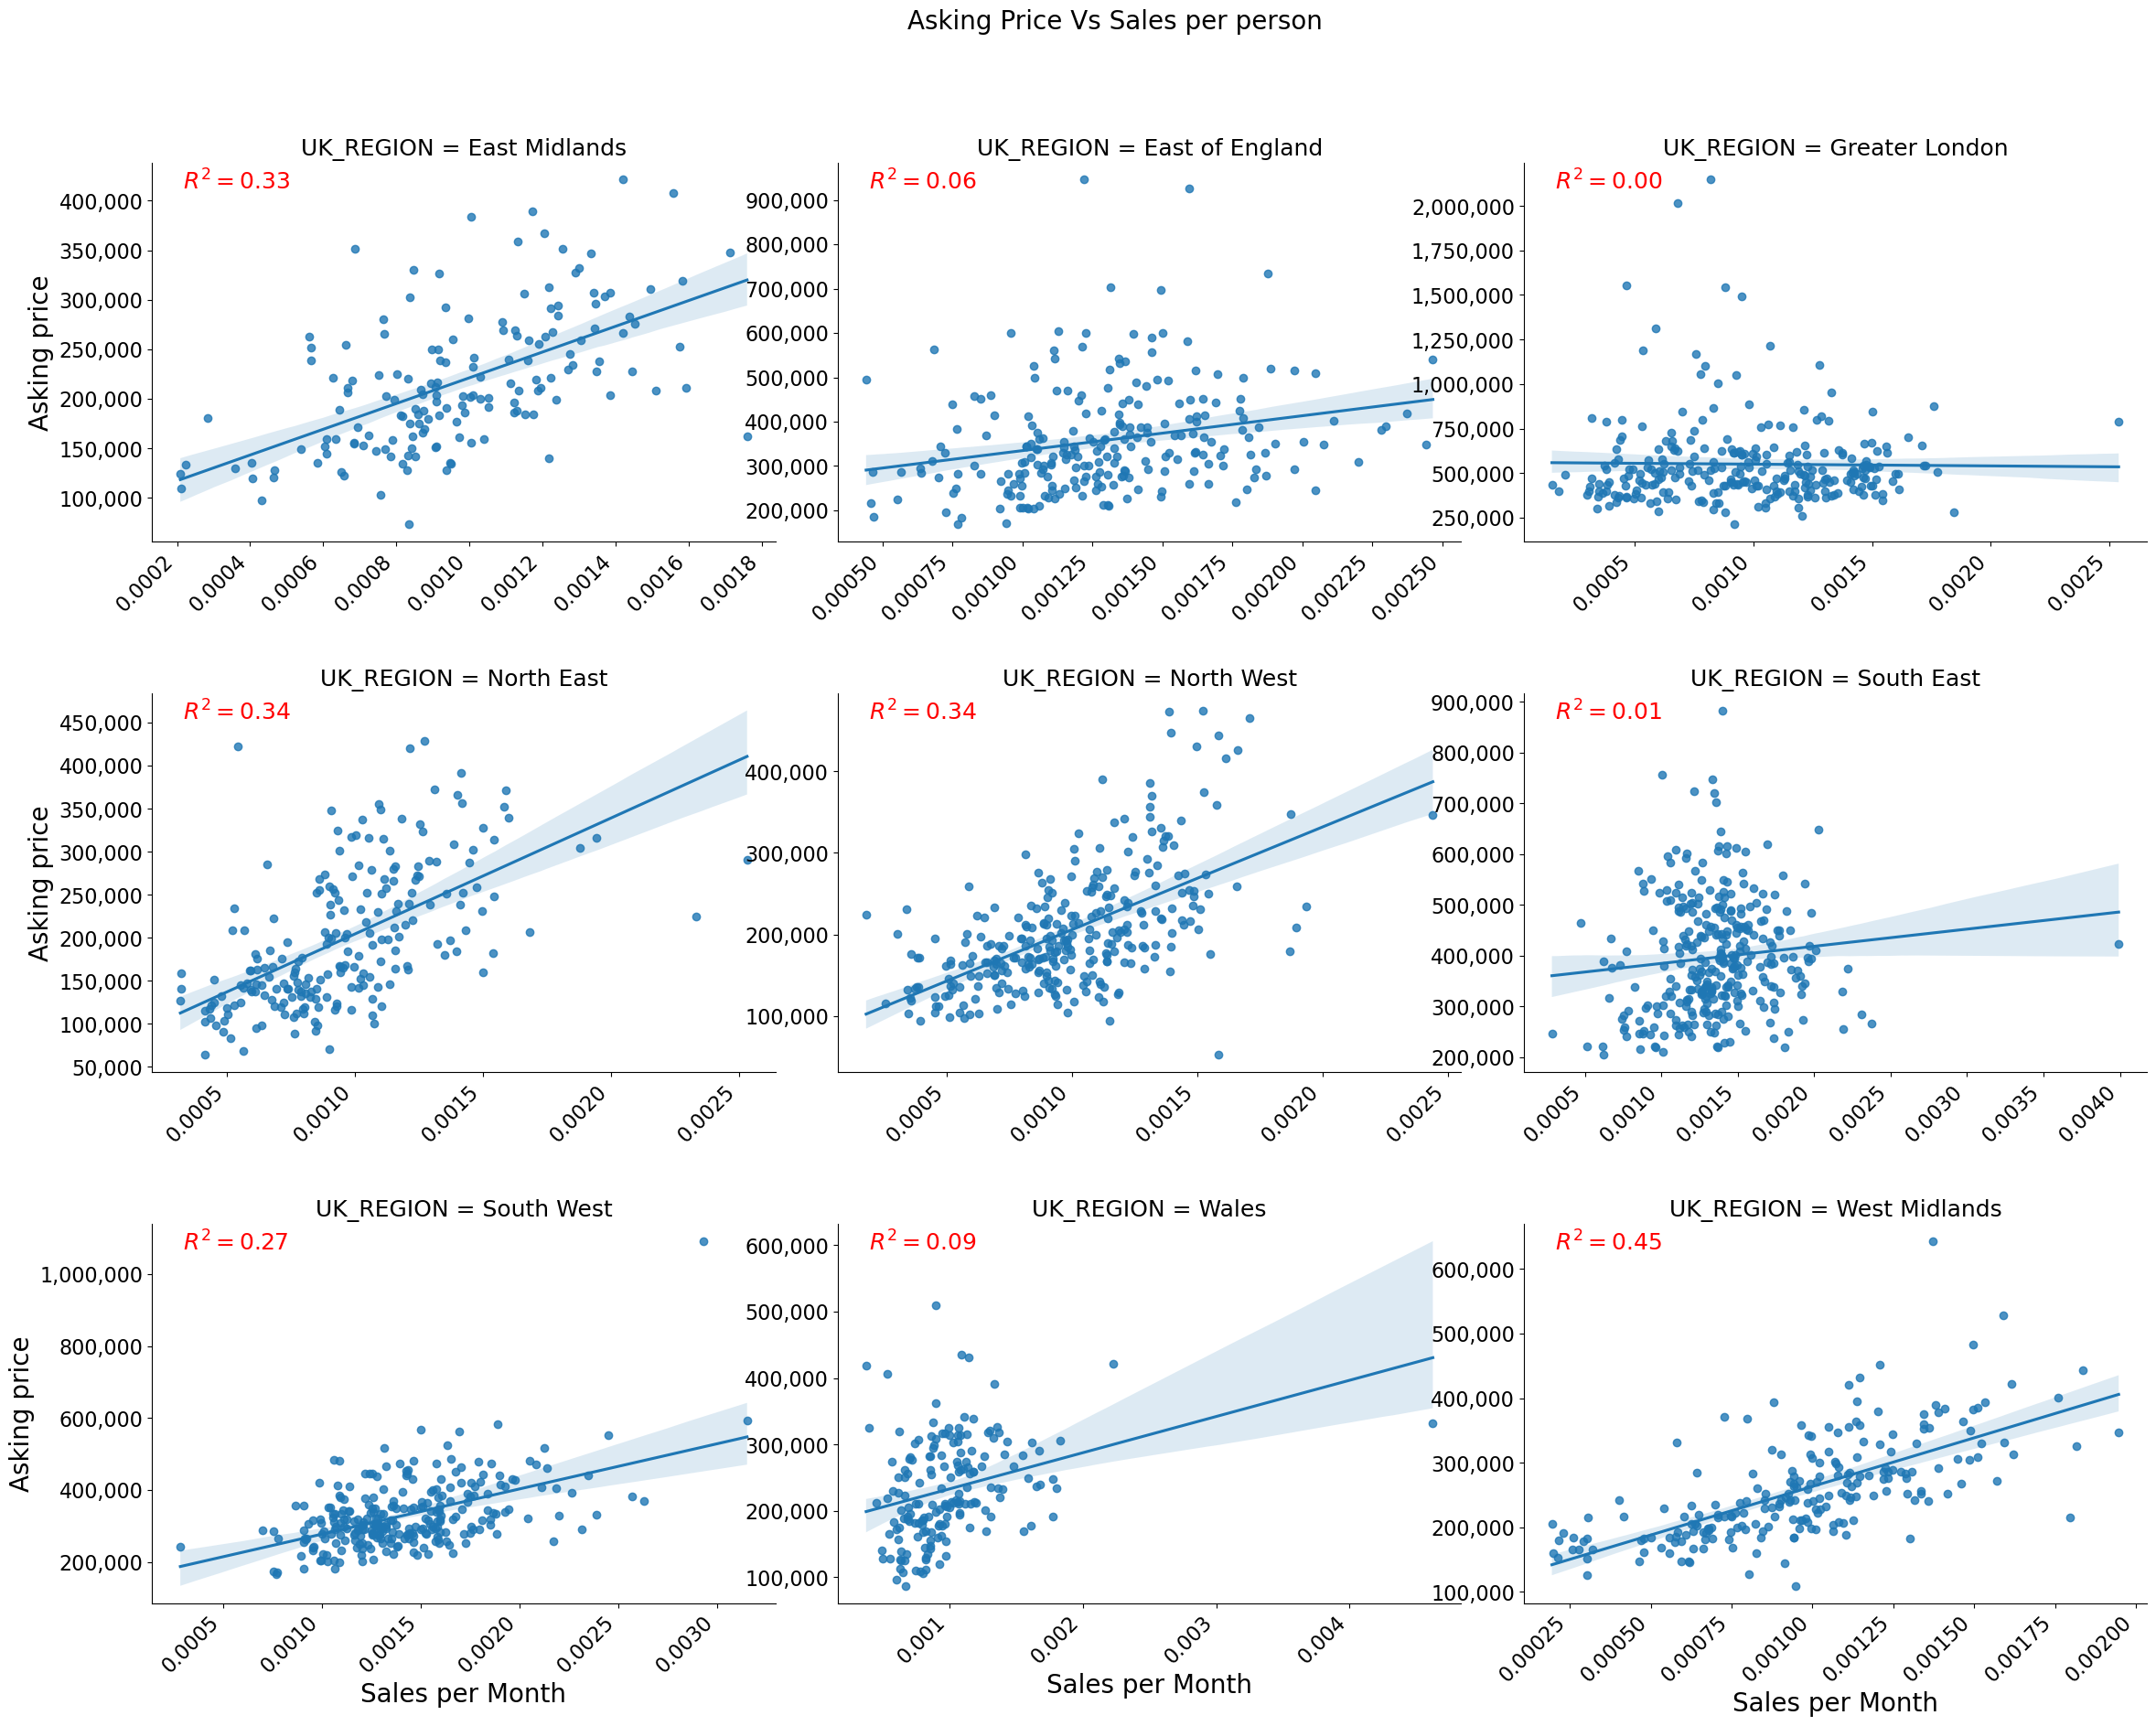

In [36]:


# Increase figure size
# plt.figure(figsize=(12, 10))



# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)


# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=7, aspect=1.1, col_wrap=3, sharey=False, sharex=False)
g.map_dataframe(regplot_with_r2, y="AVG_ASKING_PRICE", x="SALES_PER_PERSON")

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=_xticks)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Sales per Month", "Asking price", fontsize=_xlab)
g.set_titles(size=12)
g.fig.suptitle('Asking Price Vs Sales per person ', fontsize=_title)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.4, wspace=0.1)  # Adjusted values

g.set_titles(size=_facet_titles)

g.savefig('./plots/Asking Price Vs Sales per person.png', bbox_inches='tight')


C:\Users\milen\AppData\Local\Temp\ipykernel_12668\3077405938.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\3077405938.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_12668\3077405938.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


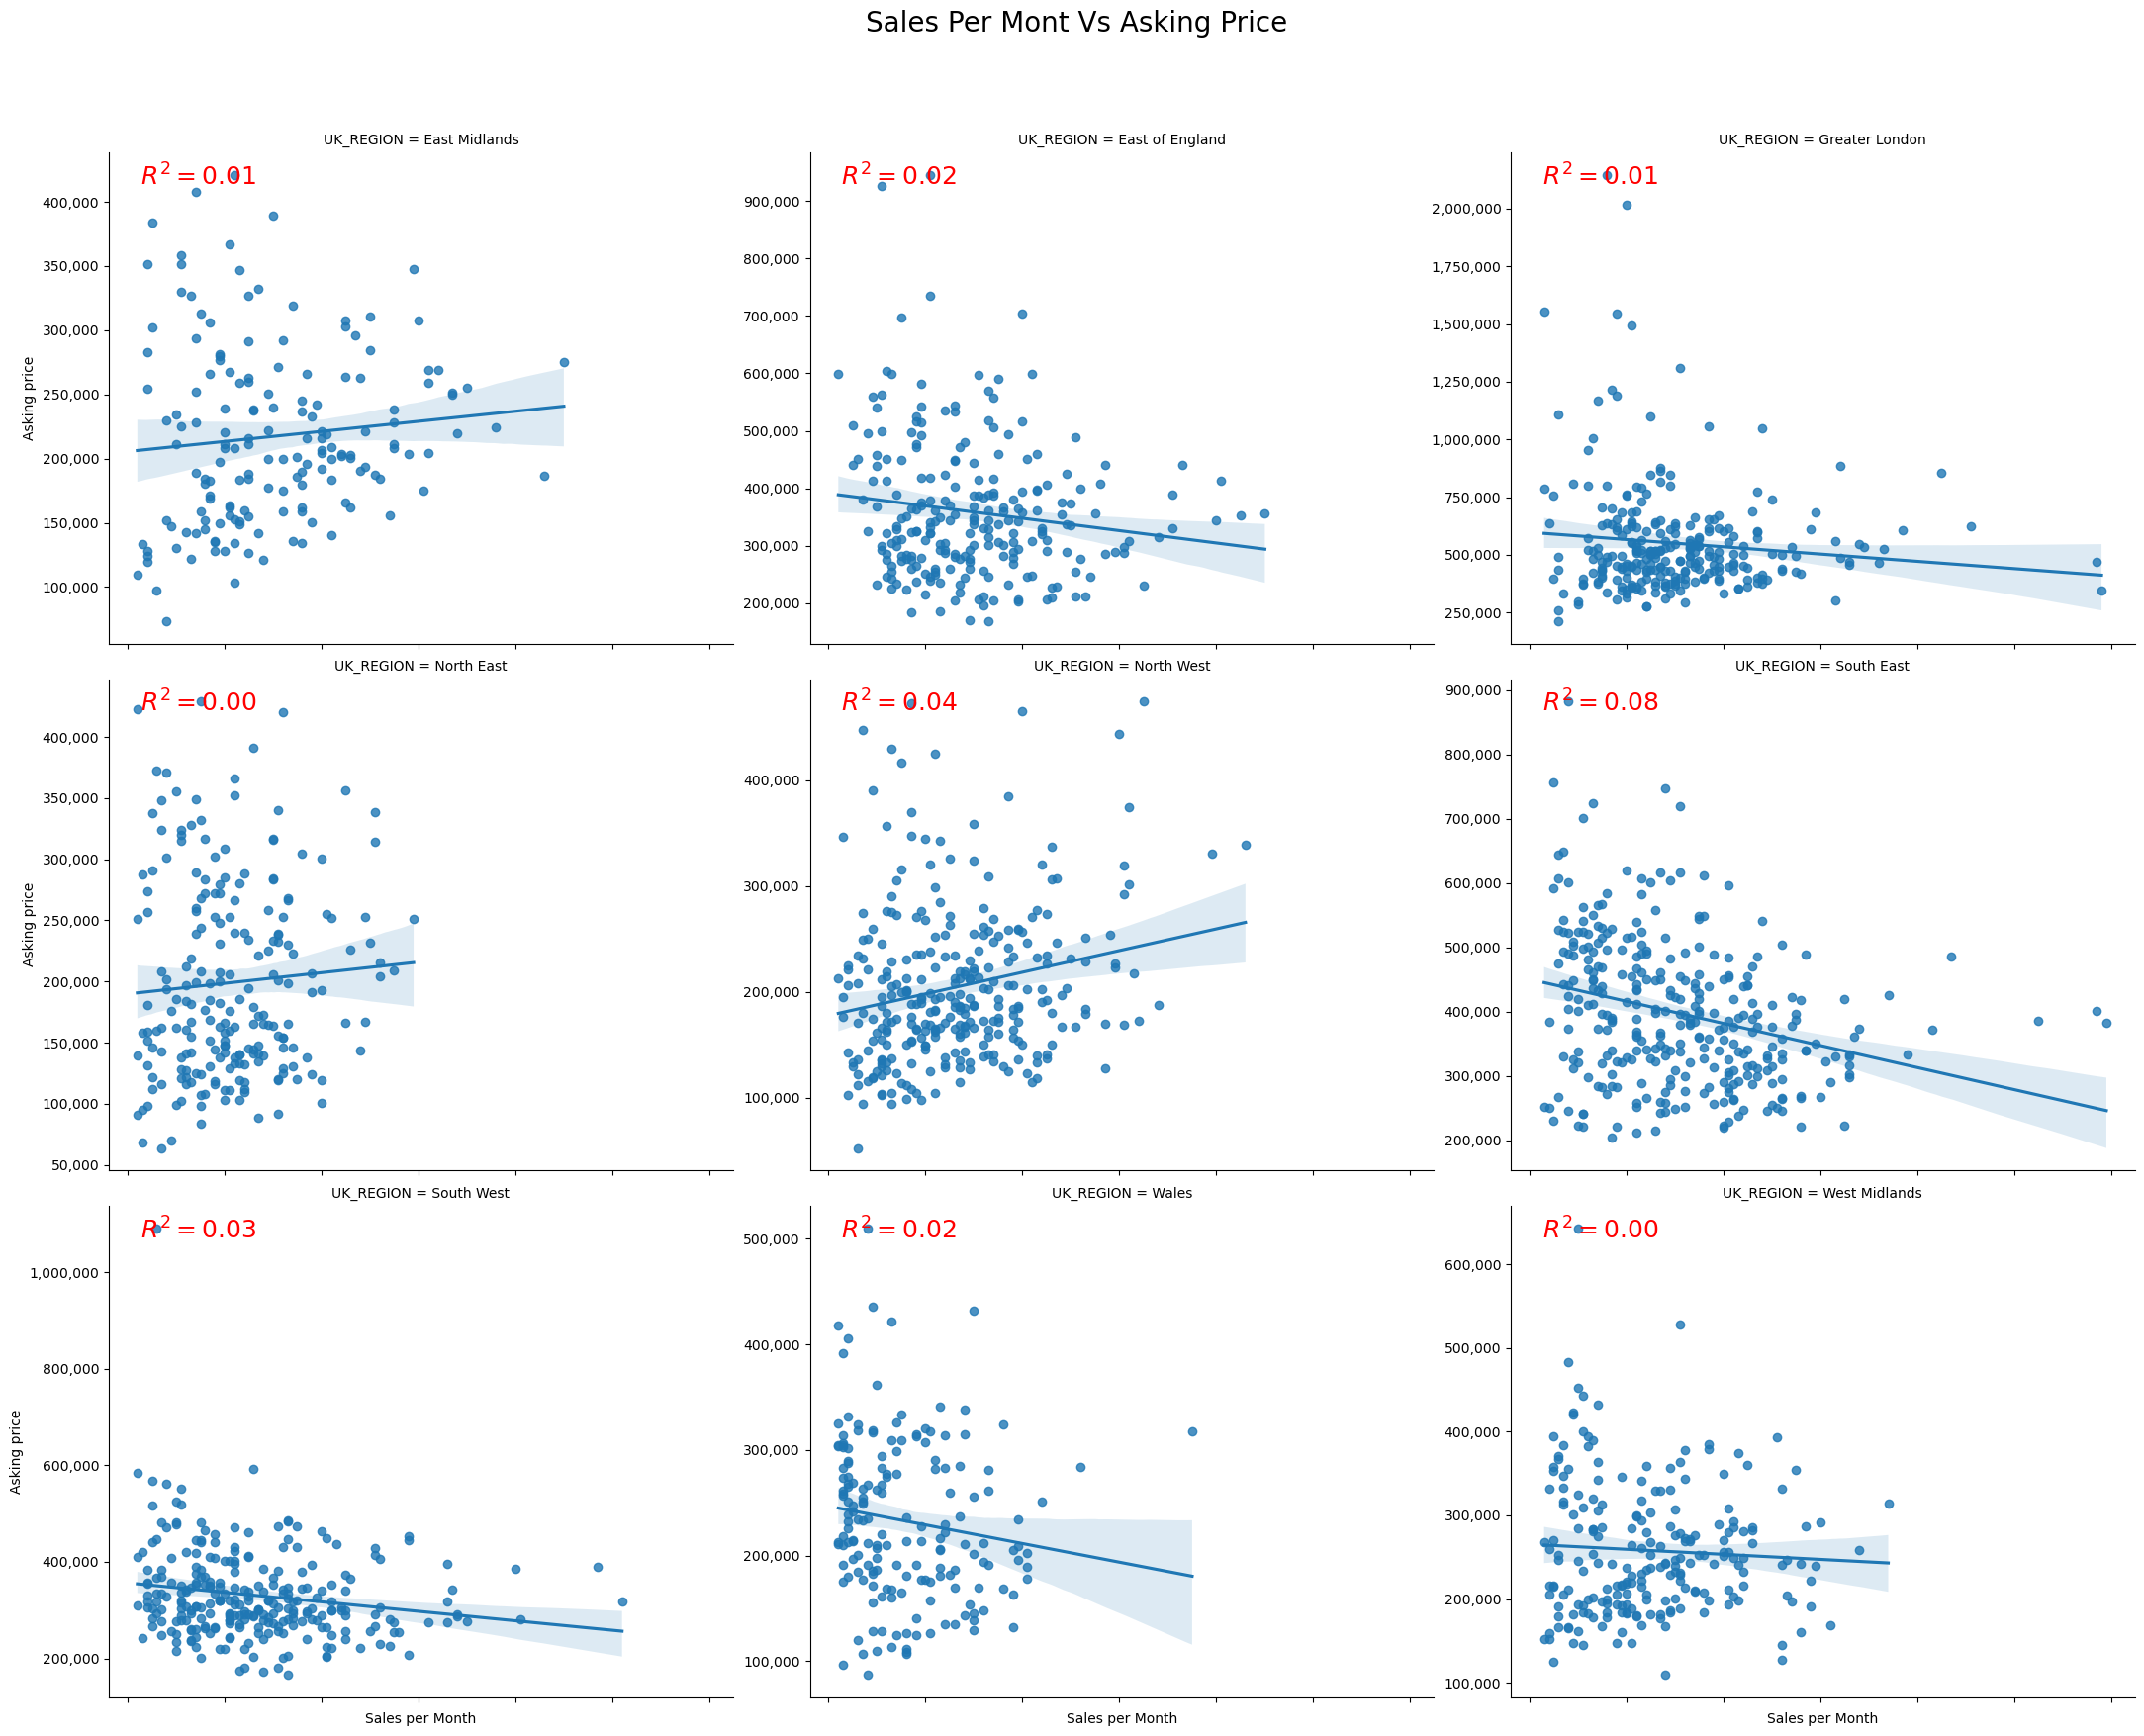

In [37]:


# Sample data

# Melt the DataFrame
data

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)


# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False)
g.map_dataframe(regplot_with_r2, y="AVG_ASKING_PRICE", x="SALES_PER_MONTH")



# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Sales per Month", "Asking price")
g.fig.suptitle('Sales Per Mont Vs Asking Price ', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Show the plot
plt.show()


## Rooms Vs ...

As expected in Greater london there are more 2 bed flats, compared to the rest of the country

In [38]:
data.groupby(['UK_REGION','AVG_BEDROOMS']).count()['POSTCODE']

UK_REGION        AVG_BEDROOMS
East Midlands    2.0              15
                 3.0             148
East of England  2.0              24
                 3.0             210
                 4.0               1
Greater London   0.0               1
                 1.0               4
                 2.0             113
                 3.0             156
North East       1.0               2
                 2.0              24
                 3.0             191
                 4.0               1
North West       1.0               1
                 2.0              36
                 3.0             263
South East       1.0               1
                 2.0              38
                 3.0             276
                 4.0               1
South West       2.0              25
                 3.0             249
                 4.0               1
Wales            2.0               4
                 3.0             176
West Midlands    0.0               1
        

### Average asking price by bedrooms

- Focus only on 2 and 3 avg bedrooms
- Can see that greater london is the only one where boroughs with smaller houses are more expensive than boroughs with 3 beds
- In greater London boroughs with predominantly smaller houses cost more than bigger - more central
- We tend to find bigger houses are further away from central areas 

In [39]:
data.groupby(['UK_REGION','AVG_BEDROOMS'])[['SALES_PER_MONTH','AVG_ASKING_PRICE','AVG_ASKING_RENT_(PM)']].mean()

SALES_PER_MONTH  AVG_ASKING_PRICE  \
UK_REGION       AVG_BEDROOMS                                      
East Midlands   2.0                 14.066667      1.490863e+05   
                3.0                 31.939189      2.244474e+05   
East of England 2.0                 29.125000      2.758178e+05   
                3.0                 30.000000      3.654754e+05   
                4.0                 11.000000      9.267300e+05   
Greater London  0.0                  3.000000      7.880000e+05   
                1.0                 13.000000      1.367088e+06   
                2.0                 32.159292      5.702200e+05   
                3.0                 29.544872      5.133732e+05   
North East      1.0                  4.500000      2.482110e+05   
                2.0                 16.130435      1.301628e+05   
                3.0                 22.147368      2.074957e+05   
                4.0                       NaN               NaN   
North West      1.0                       NaN      1.335740e+05   
                2.0                 16.388889      1.594904e+05   
                3.0                 27.702290      2.108110e+05   
South East      1.0                  5.000000      2.305850e+05   
                2.0                 39.342105      3.041226e+05   
                3.0                 29.992754      4.091435e+05   
                4.0                 28.000000      7.470290e+05   
South West      2.0                 32.480000      2.640226e+05   
                3.0                 25.825911      3.362349e+05   
                4.0                  5.000000      5.676500e+05   
Wales           2.0                 22.750000      1.886828e+05   
                3.0                 15.302857      2.337400e+05   
West Midlands   0.0                       NaN      1.691700e+05   
                1.0                  4.000000      2.158580e+05   
                2.0                 18.000000      1.855122e+05   
                3.0                 25.560606      2.659100e+05   

                              AVG_ASKING_RENT_(PM)  
UK_REGION       AVG_BEDROOMS                        
East Midlands   2.0                     613.500000  
                3.0                     681.511628  
East of England 2.0                     928.045455  
                3.0                    1020.483333  
                4.0                            NaN  
Greater London  0.0                    2138.000000  
                1.0                    2741.250000  
                2.0                    1658.415929  
                3.0                    1379.846154  
North East      1.0                    1026.500000  
                2.0                     623.450000  
                3.0                     644.947368  
                4.0                            NaN  
North West      1.0                     752.000000  
                2.0                     680.666667  
                3.0                     694.207143  
South East      1.0                    1101.000000  
                2.0                    1036.114286  
                3.0                    1095.419355  
                4.0                    1575.000000  
South West      2.0                     934.578947  
                3.0                     952.685714  
                4.0                            NaN  
Wales           2.0                     820.000000  
                3.0                     758.320000  
West Midlands   0.0                            NaN  
                1.0                     855.000000  
                2.0                     714.333333  
                3.0                     765.043103

C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

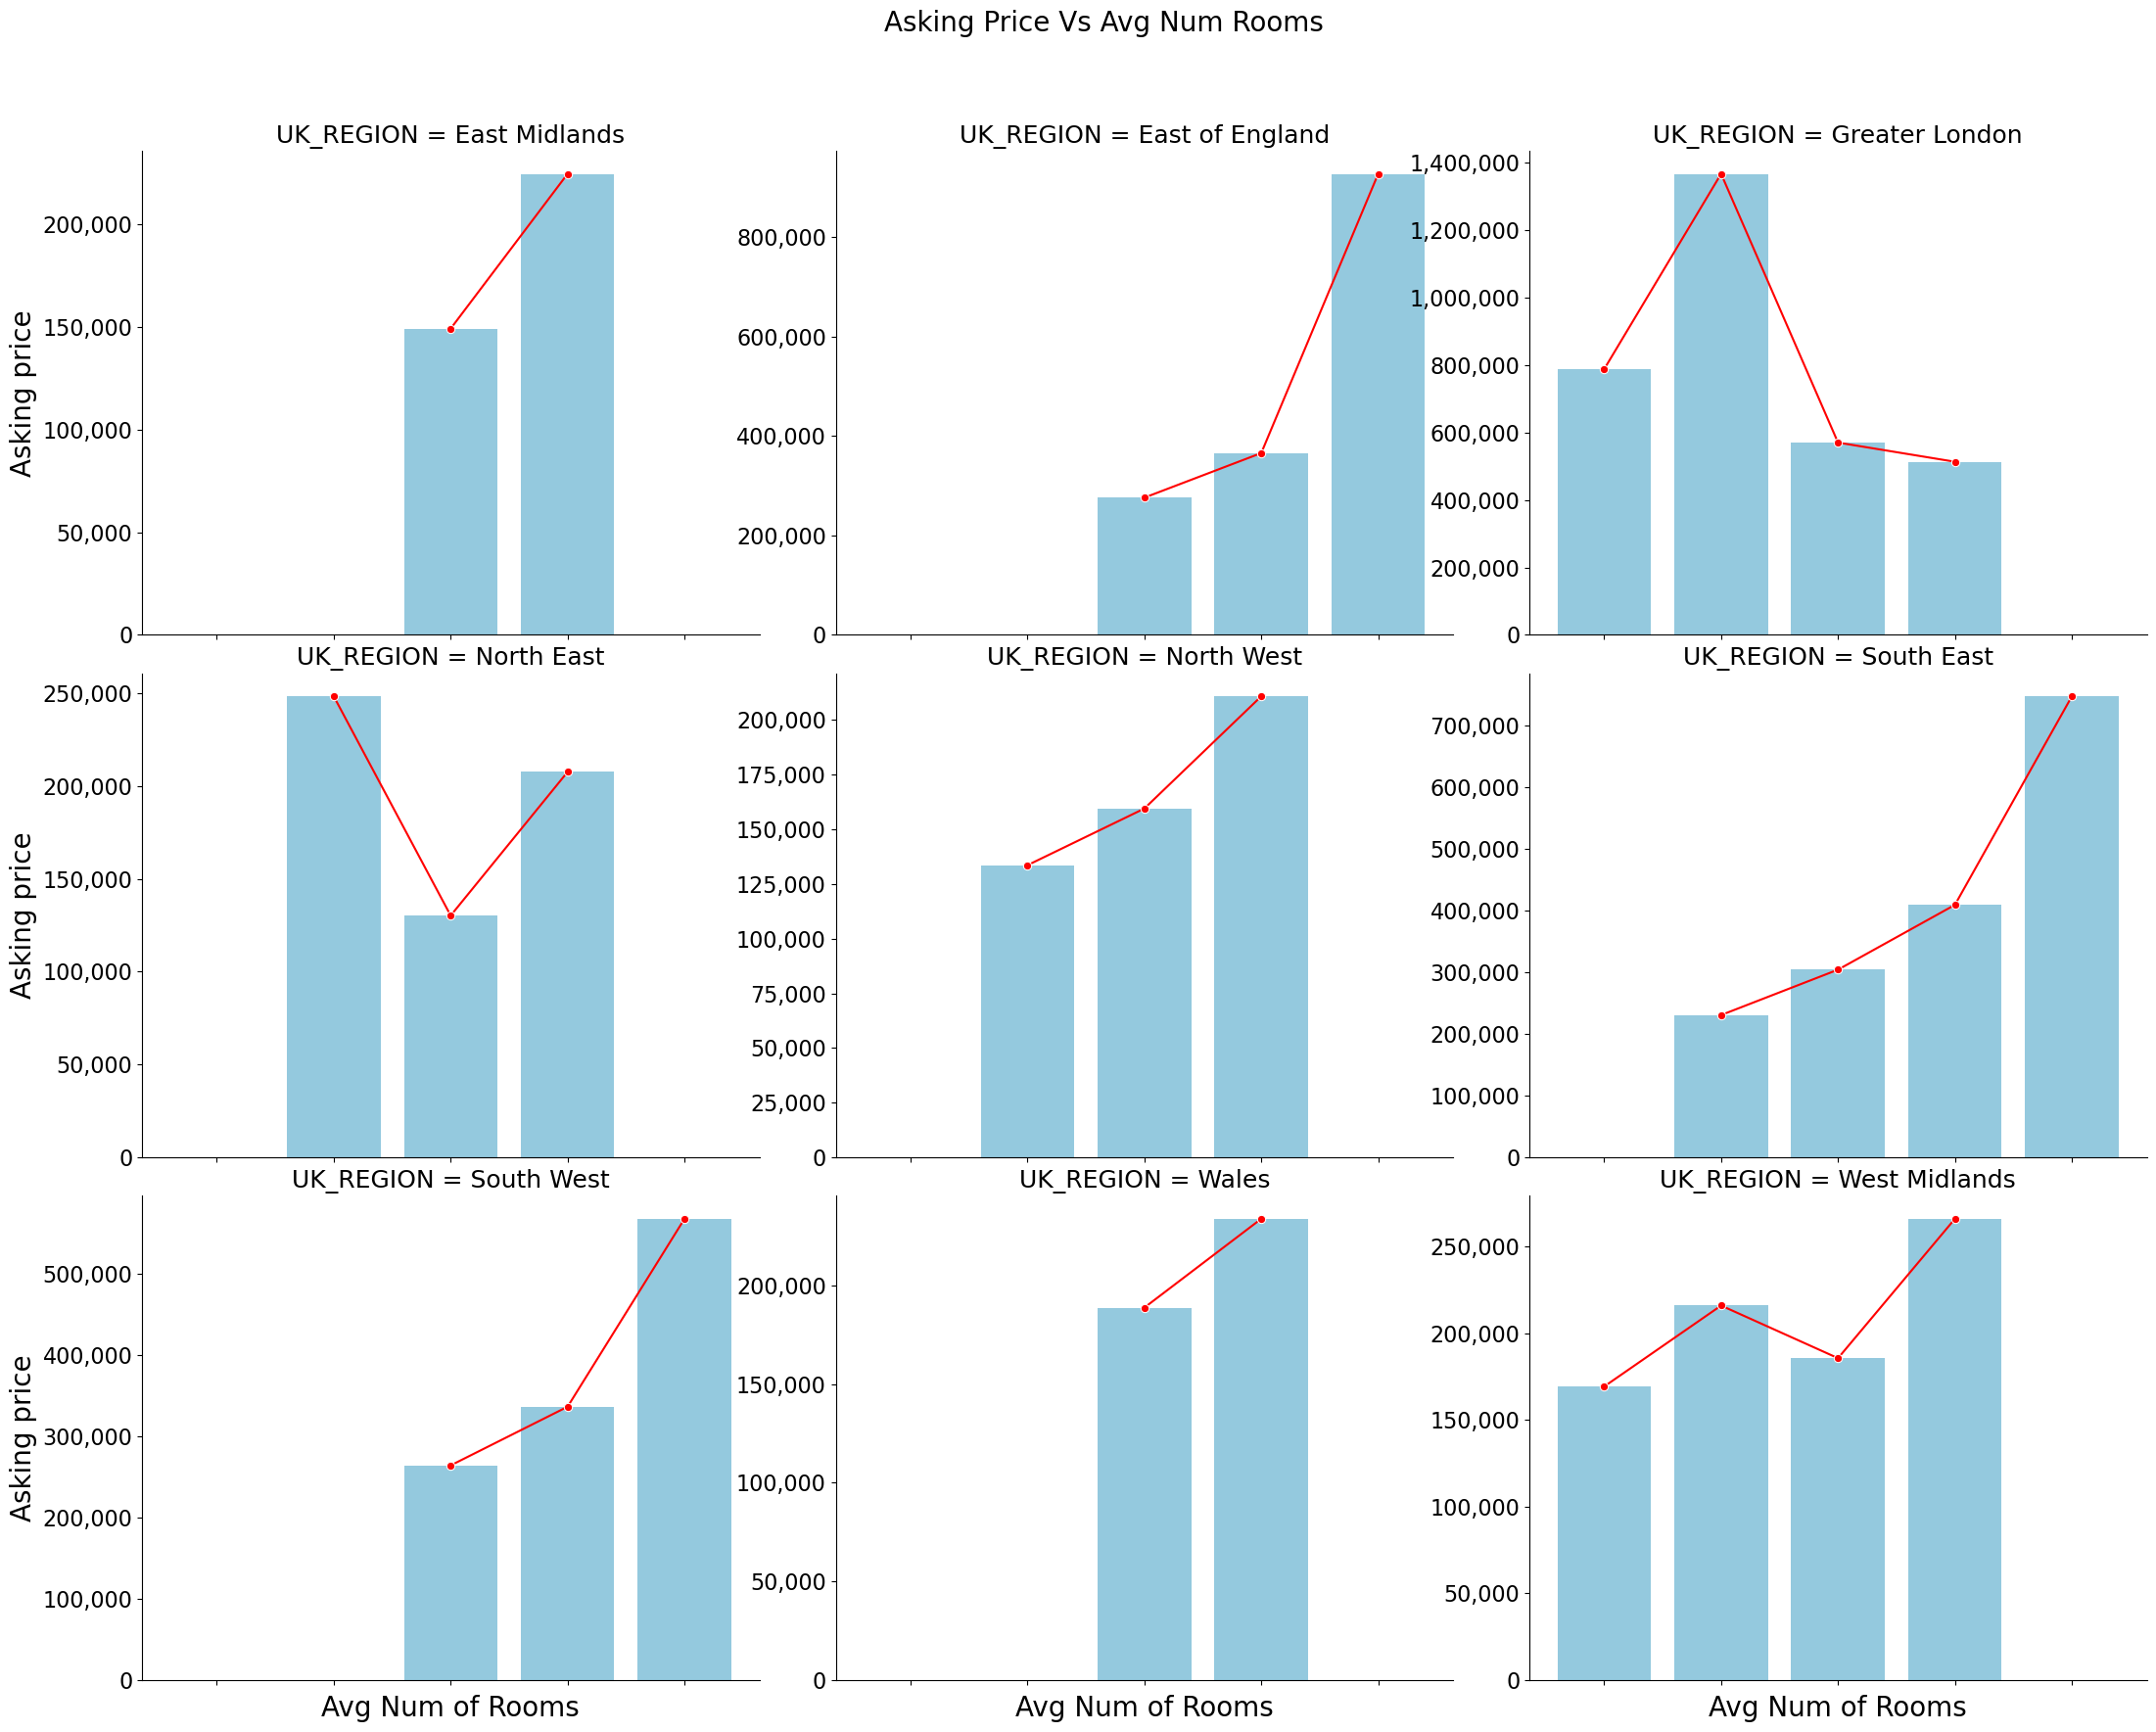

In [40]:
to_plot = data.groupby(['UK_REGION','AVG_BEDROOMS'])['AVG_ASKING_PRICE'].mean().reset_index()

# Convert the 'Category' column to a categorical type and specify the order
category_order = [0, 1, 2, 3, 4]
to_plot['AVG_BEDROOMS'] = pd.Categorical(to_plot['AVG_BEDROOMS'], categories=category_order, ordered=True)



# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False, sharex=True)
g.map_dataframe(sns.barplot, x="AVG_BEDROOMS", y="AVG_ASKING_PRICE", color=bar_color)

g.map_dataframe(sns.lineplot, x="AVG_BEDROOMS", y="AVG_ASKING_PRICE", color='red', marker='o')

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=_xticks)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=_yticks)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Avg Num of Rooms", "Asking price", fontsize=_xlab)
g.fig.suptitle('Asking Price Vs Avg Num Rooms', fontsize=_title)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

g.set_titles(size=_facet_titles)
# Show the plot



g.savefig('./plots/Asking Price Vs Avg Num Rooms.png', bbox_inches='tight')